# E-Commerce: Product Range Analysis

## Project Description
One of the most common problems e-shops face is knowing relevant customer preferences. The main goal is to analyze customer's purchase history to come up with a relevant product range which would optimize purchases and offers.

### Main steps
1. __Data Preprocessing__
    - Study type correspondence
    - Study missing values
    - Study duplicate values
    - Change data types to appropriate types
    - Remove duplicates
    - Process missing values if possible
    

2. __Exploratory data analysis__
    - Study data profile report
    - Check min, max and average values
    - Check distributions
    - Check for outlyers and nonsence values


3. __Analyse product line to determine which products to include in the main and additional assortment in order to competently offer additional products to buyers and optimize purchases.__
    - See the products price range and it's distribution  
    - See the most and the least sold products
    - See the products with the most and the least quantity purchacsed
    - See the products with most and least price per unit
    - According to previous findings determine price range categories
    - Identify if there is a seasonality: analyse if there is a change in product's sales according to season. At least for the top sales products see it's sales amounts during summer months and winter and compare results.
    - See if there are any changes for recent month or two: Does the top-sales products differ for the last month as compared to top products of the whole period? Compare results.
    - Are there any categories that can be toggled according to product's names? Like "Kids", "Kitchen ware" or any other relations that could help figure out main and additional products within each category?
    - Determine products that are more often sold by themselves and which ones are more often combined with others (main and additional assortment). Analyse customer's orders.
    - According to the groups determined above, see what product groups are more often included in the additional assortment?
    - What bundles of product groups are often present in shopping carts? For example, the category "houseplants" can often be accompanied by "mineral fertilizers".
    - Draw conclusions: what are the product groups and how they are usually combined in the orders.
    

5. __Formulate and test statistical hypotheses__
    - According to patterns found during analysis, pick out those that seem to affect the results the most and formulate the hypothesis to check.
    
    
6. __Final conclusion and recomendations__


7. __Create a presentation__
    - According to patterns found during analysis, pick out those that seem to affect the results the most and formulate the hypothesis to check.
  

## Contents <a class="anchor" id="contents"></a>

1. __[Step 1. Open the data files and study the general information](#step1)__

    * [Libraries and Datasets upload](#step1-1)
    * [General information analysis](#step1-2)
    * [Data overview](#step1-3)

<p> </p>  

2. __[Step 2. Data preprocessing](#step2)__

    * [Data types convertion](#step2-1)
    * [Replacing missing values](#step2-2)
    * [Duplicate values](#step2-3)
    * [Nonsense values](#step2-4)
    * [Data preprocessing overview](#step2-5)
<p> </p> 

3. __[Step 3. Exploratory data analysis (EDA)](#step3)__
    
    - [Products price range and it's distribution. Most and least price per unit](#step3-3)
    - [Price range categories](#step3-4)
    - [Products quantity and it's distribution](#step3-10)
    - [Product categories](#step3-7)
    - [The most and the least sold products](#step3-1)
    - [Products with the most and the least quantity purchacsed](#step3-2)
    - [Seasonality](#step3-5)
    - [Recent months top products compared to all time tops](#step3-6)
    - [Categories with most revenue](#step3-14)
    - [Categories frequently purchased together](#step3-12)
    - [Main and additional products](#step3-13)
    - [Bundles](#step3-8)
    * [EDA Overview](#step3-9)
<p> </p>  

4.  __[Step 4. Testing Hypothesis](#step-4)__  

    * [Difference between average price per unit among top two categories](#step4-1)
    * [Difference between average purchase size among top two categories](#step4-2)
    * [Difference between average quntity among top two categories](#step4-3)
    * [Difference between purchase amount among top two categories](#step4-4)
    * [Testing overview](#step4-5)


5. __[Overall Conclusion](#overall)__


6. __[Presentation](#pres)__


7. __[Dashboard](#dash)__

## Step 1. Open the data files and study the general information <a class="anchor" id="step1"></a>  
[Go back to the Contents](#contents)

### Libraries and Datasets upload <a class="anchor" id="step1-1"></a>  
[Go back to the Contents](#contents)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport

import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from itertools import cycle

from scipy import stats as st
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Google drive
ecom = pd.read_csv('https://drive.google.com/uc?export=download&id=1ikFlLV2_MEoJPNMllCYvlusea71ot02-', sep='\t',
                   parse_dates=['InvoiceDate']) 


### General information analysis <a class="anchor" id="step1-2"></a>  
[Go back to the Contents](#contents)
- General information analysis
- Missing values detection
- Data types overview
- Overall description of the data 
- Checking for nonsense values
- Checking for duplicates

#### Data description

The file `ecommerce_dataset_us.csv` contains the following columns:
- `InvoiceNo` — order identifier
- `StockCode` — item identifier
- `Description` — item name
- `Quantity`
- `InvoiceDate` — order date
- `UnitPrice` — price per item
- `CustomerID`

In [3]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [4]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [5]:
ecom.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2019-12-07 12:50:00,4.95,12680.0


In [6]:
ProfileReport(ecom, minimal=True)

### Data overview <a class="anchor" id="step1-3"></a>  
[Go back to the Contents](#contents)

- _Description_ and _CustomerID_ columns contain missing values. There are 3.6% of cells missing in total.
- There are 5268 duplicate rows, which make about 1%
- Data types are correct except _InvoiceNo_ column, where object type should be changed to numeric and CustomerID, where float type should be changed to int
- All orders took place between 29/11/2018-07/12-2019, a bit more than a year period
- There are 25900 (4.8%) unique invoices (orders)
- There are 4070 unique items, though there are 4223 unique item's descriptions, so it seems like same products can have several descriptions.
- There are negative quantaties, which seem either like an error or like return. The most common quantity is 1, 27.4% of all quantities are equal to 1. Median quantity is 3. Also we can see that the biggest quantity of 80995 equals to the highest negative quantity so it looks like this was either return or an error.
- There are negative prices as well, which also seem either like an error or like return. Also we can see zero prices, may be these were gifts. Average price is 4.6 while median is 2. There is a huge gap between 90% of all prices and the minimum and maximum prices.  
- There are 4372 unique customers and we can see that about 25% of values in the column are missing. So may be these values can be restored within same order or there are any other dependencies, that should be investigated.

__Top-5 most frequently ordered goods are:__
- WHITE HANGING HEART T-LIGHT HOLDER, 2369 (0.4%)	 
- REGENCY CAKESTAND 3 TIER, 2200 (0.4%)	 
- JUMBO BAG RED RETROSPOT, 2159 (0.4%) 
- PARTY BUNTING, 1727 (0.3%)
- LUNCH BAG RED RETROSPOT, 1638	(0.3%)

__Top-5 most frequent stock codes are:__
- 85123A (2313)
- 22423	(2203)
- 85099B (2159)
- 47566	(1727)
- 20725	(1639)

__Top-5 orders with most item range:__
- 573585 with 1114 different items
- 581219 with 749 different items
- 581492 with 731 different items
- 580729 with 721 different items
- 558475 with 705 different items

## Step 2. Data preprocessing <a class="anchor" id="step2"></a>  
[Go back to the Contents](#contents)

### Data types convertion <a class="anchor" id="step2-1"></a>  
[Go back to the Contents](#contents)

In [7]:
# Trying to convert d-type for invoice
try:  
    ecom.InvoiceNo=ecom.InvoiceNo.astype('int64') 
except Exception as e: 
    print(e)

invalid literal for int() with base 10: 'C536379'


In [8]:
# Checking if "C" stands for "Cancel"
print(ecom[ecom.InvoiceNo.str.startswith('C')]['Quantity'].describe())

count     9288.000000
mean       -29.885228
std       1145.786965
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64


Looks like all orders with invoice, starting with "C" are cancelations.   
Let's see if there are other letters used in the invoice number.

In [9]:
for s in ecom['InvoiceNo']:
    match=re.search('[a-zA-BD-Z]', s)
    if match is not None:
        print(match)

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>


In [10]:
# Checking what is "A" stands for
ecom[ecom.InvoiceNo.str.startswith('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


"Adjust bad debt" that was used without any Customer ID

I won't change invoice type and leave as object, at least till I need info about cancelations and debt adjustments.
Now let's see if there is a chance to change data type in Customer ID column, as it means replacing NaN.

### Replacing missing values <a class="anchor" id="step2-2"></a>  
[Go back to the Contents](#contents)

Replacing missing values in Description column according to Stock Code

In [11]:
#Fill in missing values:
print(len(ecom[ecom['Description'].isnull()]))
ecom['Description'] = ecom['Description'].fillna(ecom.groupby('StockCode')['Description'].transform('first'))
print(len(ecom[ecom['Description'].isnull()]))

1454
112


Still 112 missing descriptions, let's see if there are any connections

In [12]:
ecom[ecom['Description'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
1988,536550,85044,NaN,1,2018-11-29 14:34:00,0.0,NaN
2024,536552,20950,NaN,1,2018-11-29 14:34:00,0.0,NaN
2026,536554,84670,NaN,23,2018-11-29 14:35:00,0.0,NaN
7187,536995,35951,NaN,57,2018-12-01 15:29:00,0.0,NaN
7193,537001,21653,NaN,-6,2018-12-01 15:33:00,0.0,NaN
19628,537875,20849,NaN,1,2018-12-06 18:08:00,0.0,NaN
19631,537878,72803B,NaN,1,2018-12-06 18:09:00,0.0,NaN
21782,538133,85018C,NaN,3,2018-12-07 15:56:00,0.0,NaN


Rest of the rows with missing description seems also to miss customer ID and have zero price, let's check these assumptions.

In [13]:
print(ecom[ecom['Description'].isnull()].UnitPrice.value_counts())
print()
print(ecom[ecom['Description'].isnull()].CustomerID.value_counts())

0.0    112
Name: UnitPrice, dtype: int64

Series([], Name: CustomerID, dtype: int64)


They all have zero price and no customer ids, so I'll delete these rows as they do not have any needed data for furter investigation.

In [14]:
ecom = ecom[ecom['Description'].notna()]
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541797 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  object        
 1   StockCode    541797 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


Now let's see if there is an option to replace NaN values in customer ids

In [15]:
#Fill in missing values:
print(len(ecom[ecom['CustomerID'].isnull()]))
ecom.loc[:, 'CustomerID'] = ecom.loc[:, 'CustomerID'].fillna(ecom.groupby('InvoiceNo')['CustomerID'].transform('first'))
print(len(ecom[ecom['CustomerID'].isnull()]))

134968
134968


/Users/maki-maki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Looks like there are no orders that partly miss Customer ID info. Let's see how many orders miss Customer ID.

In [16]:
print('Total orders with non-null CustomerID:',len(ecom[ecom['CustomerID'].notnull()].InvoiceNo.value_counts()))
print('Total orders with null CustomerID:', len(ecom[ecom['CustomerID'].isnull()].InvoiceNo.value_counts()))

Total orders with non-null CustomerID: 22190
Total orders with null CustomerID: 3598


About 14% of all orders have no Customer ID

In [17]:
# Let's see the bigest orders among those with no Customer ID
ecom[ecom['CustomerID'].isnull()].InvoiceNo.value_counts().head(20)

573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
580367     650
580115     645
581439     635
580983     629
578344     622
538349     620
578347     606
537638     601
537237     597
536876     593
Name: InvoiceNo, dtype: int64

There are very big orders that look like corporate customers orders.

In [18]:
# Let's see the bigest orders among those with no Customer ID
ecom[ecom['CustomerID'].isnull()].InvoiceNo.value_counts().tail(20)

578337     1
C538189    1
549376     1
562391     1
562546     1
C538682    1
538039     1
551019     1
573318     1
546148     1
570120     1
566325     1
575513     1
558724     1
564644     1
562805     1
554830     1
573672     1
C572347    1
542518     1
Name: InvoiceNo, dtype: int64

Though there are only 1 item orders as well as cancelations.

In [19]:
orders=ecom.groupby('CustomerID')['InvoiceNo'].count().reset_index()
orders['InvoiceNo'].describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: InvoiceNo, dtype: float64

On average, each customer did 93 orders, though we can see that the data is very skewed as median amount of orders is only 42.  
There are definetly present both type of customers: corporate and private clients.


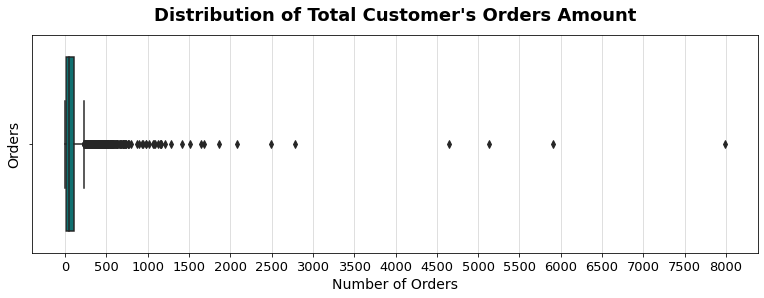

In [20]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=orders['InvoiceNo'], color='teal')

ticks = np.arange(0, 8500, 500)
plt.xticks(ticks, fontsize=13)
plt.yticks(fontsize=17)

# Decoration
plt.title("Distribution of Total Customer's Orders Amount", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel("Orders", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

So we can see that most users did 700 orders or less, but we can see that there are customers who placed up to 7983 orders. So those orders with no customer id can all belong to one user as well as belong to several and there is no exact way to figure it out. Though it doesn't affect further investigation.

### Duplicate values <a class="anchor" id="step2-3"></a>  
[Go back to the Contents](#contents)

In [21]:
# Cheching totaly duplicated rows amount
len(ecom[ecom.duplicated()])

5268

In [22]:
# Checking some orders numbers with duplicated rows
ecom[ecom.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0


In [23]:
# Checking duplicated items within one particular order
display(ecom[(ecom.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate','UnitPrice']))&
             (ecom['InvoiceNo']=='536409')],
        ecom[(ecom.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate','UnitPrice'],keep='last'))&
             (ecom['InvoiceNo']=='536409')])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2018-11-29 11:45:00,6.35,17908.0
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2018-11-29 11:45:00,2.10,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2018-11-29 11:45:00,6.35,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2018-11-29 11:45:00,6.35,17908.0
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,2018-11-29 11:45:00,2.10,17908.0
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2018-11-29 11:45:00,6.35,17908.0
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0


Looks like most of duplicated items are totaly identical, but we can see that there is an item that has different quantity. May be these were items that were added to cart a couple of times and there is no automatical feature that combines them, so a customer could really purchase same item 2 times instead of having it once in the cart with right amount. So I would adjust the amount of such items to get rid of duplicates.

In [24]:
# Calculating real items quantity
quant=ecom.groupby(['InvoiceNo','StockCode','Description','InvoiceDate','UnitPrice'])['Quantity'].sum().reset_index()

# Replacing duplicated items rows and updating quantity to correct
print(ecom.shape)
ecom=ecom.drop_duplicates(subset = ['InvoiceNo','StockCode','Description','InvoiceDate','UnitPrice'])
del ecom['Quantity']
ecom=ecom.merge(quant, on=['InvoiceNo','StockCode','Description','InvoiceDate','UnitPrice'], how='left')
print(ecom.shape)

# Rearranging columns
ecom=ecom[['InvoiceNo','StockCode','Description',
           'InvoiceDate','UnitPrice','Quantity','CustomerID']]
ecom.head()

(541797, 7)
(531696, 7)


,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2018-11-29 08:26:00,2.55,6,17850.0
1,536365,71053,WHITE METAL LANTERN,2018-11-29 08:26:00,3.39,6,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2018-11-29 08:26:00,2.75,8,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2018-11-29 08:26:00,3.39,6,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2018-11-29 08:26:00,3.39,6,17850.0


### Nonsense values <a class="anchor" id="step2-4"></a>  
[Go back to the Contents](#contents)

In [25]:
# Checking how many stock codes have more than 1 description
desc_count=(ecom.groupby('StockCode')
            ['Description'].nunique().reset_index()
            .sort_values(by='Description', ascending=False))

print('Amount of unique stock codes:',len(desc_count))
print('Stock codes with more than one description:',len(desc_count[desc_count['Description']>1]))
desc_count.head()

Amount of unique stock codes: 3958
Stock codes with more than one description: 650


,StockCode,Description
168,20713,8
1947,23084,7
841,21830,6
3495,85175,6
2804,72807A,5


650 unique stock codes have more than 1 description, that make 16% of all unique stock codes. We can also see that there are stock codes with up to 8 different descriptions. Let's see some of such descriptions.

In [26]:
display(ecom[ecom['StockCode']=='20713']['Description'].unique(),
        ecom[ecom['StockCode']=='23343']['Description'].unique(),
        ecom[ecom['StockCode']=='21830']['Description'].unique(),
        ecom[ecom['StockCode']=='72807A']['Description'].unique())

array(['JUMBO BAG OWLS', 'wrongly marked. 23343 in box',
       'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

array(['JUMBO BAG VINTAGE CHRISTMAS ', 'came coded as 20713',
       'wrongly coded 20713', '20713 wrongly marked', '20713'],
      dtype=object)

array(['ASSORTED CREEPY CRAWLIES', 'MERCHANT CHANDLER CREDIT ERROR, STO',
       'sold as 1', '?', 'damaged', 'OOPS ! adjustment'], dtype=object)

array(['SET/3 ROSE CANDLE IN JEWELLED BOX', 'wet pallet', 'damages',
       '???missing', 'AMAZON'], dtype=object)

Looks like "description" was used not just as item description but for remarks as well as "damaged" or any problems with items.

In [27]:
# Checking some of damaged goods to see any paterns
ecom[ecom['Description']=='damaged'].head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
152048,549935,35915C,damaged,2019-04-11 11:16:00,0.0,-43,NaN
152184,549948,37488A,damaged,2019-04-11 12:55:00,0.0,-1,NaN
164087,550954,47013A,damaged,2019-04-19 16:18:00,0.0,-2,NaN
167696,551302,48189,damaged,2019-04-25 14:55:00,0.0,-18,NaN
177686,552331,22667,damaged,2019-05-07 10:24:00,0.0,-30,NaN


Looks like products with notes instead of the description could have negative quantity and zero price. Let's see how many positions in total have negative quantity or zero price.

In [28]:
# Checking negative and zero quantaties and prices
print('Zero price items:',len(ecom[ecom['UnitPrice']==0]))
print('Negative price items:',len(ecom[ecom['UnitPrice']<0]))
print('Negative or zero quantity items:',len(ecom[ecom['Quantity']<=0]))
print('Negative or zero quantity and price items:',len(ecom[(ecom['Quantity']<=0)&(ecom['UnitPrice']<=0)]))

Zero price items: 2394
Negative price items: 2
Negative or zero quantity items: 10457
Negative or zero quantity and price items: 1239


Looks like there are a lot of cancelations that were done as additional order with negative quantity and they make about 2% of all rows. Also we can see that there are zero price items that could be gifts and both zero price and negative quantity items that could be returns or any damaged itemes that were not returned but only refund were made.

So further negative quantity could be used to see the exact amount of each item purchased.

In [29]:
# Checking if prices vary for each position
codes=ecom.groupby('StockCode')['UnitPrice'].nunique().reset_index()
print('Total amount of stock codes:',len(codes))
print('Amount of codes with more than 1 price:', len(codes[codes['UnitPrice']>1]))
codes.sort_values(by='UnitPrice', ascending=False).head(10)

Total amount of stock codes: 3958
Amount of codes with more than 1 price: 3603


,StockCode,UnitPrice
3947,DOT,687
3948,M,260
3950,POST,114
3936,D,75
3951,S,59
3931,AMAZONFEE,30
3933,BANK CHARGES,26
2680,47566,16
3935,CRUK,16
2860,79321,16


We can see that 91% (3603 out of 3958) of all unique items have more than one price, so seems like prices could depend on discounts for corporative clients or change with time or be affected by the promos.  

Most price varience have service operations with stock codes:
- DOT (687)
- M (260)
- POST (114)
- D (75)
- S (59)

### Data preprocessing overview <a class="anchor" id="step2-5"></a>  
[Go back to the Contents](#contents)

##### What I found in the data:
- all orders with invoice, starting with "C" are cancelations and with “A” "Adjust bad debt"
- About 14% of all orders have no Customer ID
- On average, each customer did 93 orders, though we can see that the data is very skewed as median amount of orders is only 42. There are definetly present both type of customers: corporate and private clients.
- Most users did 700 orders or less, but we can see that there are customers who placed up to 7983 orders. 
- Most duplicated items were totaly identical, but we can see that there were items that had different quantity. May be these were items that were added to cart a couple of times and there is no automatical feature that combines them, so a customer could really purchase same item 2 times instead of having it once in the cart with right amount. So I would adjust the amount of such items to get rid of duplicates.
- 650 unique stock codes have more than 1 description, that make 16% of all unique stock codes. We can also see that there are stock codes with up to 8 different descriptions.
- "description" field was used not just as item description but for remarks as well as "damaged" or any problems with items. Some products with notes instead of the description had negative quantity and zero price.
- There are a lot of cancelations that were done as additional order with negative quantity and they make about 2% of all rows. Also we can see that there are zero price items that could be gifts and both zero price and negative quantity items that could be returns or any damaged itemes that were not returned but only refund was made.
- 91% (3603 out of 3958) of all unique items have more than one price, so seems like prices could depend on discounts for corporative clients or change with time or be affected by the promos. Most price varience have service operations with stock codes:
    - DOT (687)
    - M (260)
    - POST (114)
    - D (75)
    - S (59)

##### What was edited:
- Rows with missing descriptions were deleted
- The quantity was adjusted to get rid of duplicates

## Step 2. Exploratory data analysis (EDA) <a class="anchor" id="step3"></a>  
[Go back to the Contents](#contents)

Analyse product line to determine which products to include in the main and additional assortment in order to competently offer additional products to buyers and optimize purchases.

### Products price range and it's distribution. Most and least price per unit <a class="anchor" id="step3-3"></a>  
[Go back to the Contents](#contents)

In [30]:
# Let's determine outlyers
ecom.UnitPrice.describe()

count    531696.000000
mean          4.658389
std          97.683718
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Minimum and maximum values looks like really far lying outlyers and more like a manual operations.

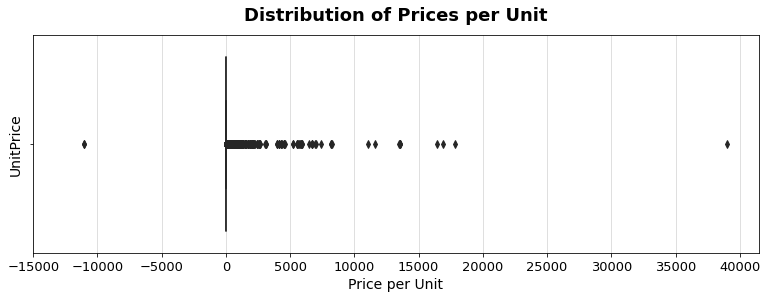

In [31]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=ecom['UnitPrice'], color='teal')

ticks = np.arange(-15000, 45000, 5000)
plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Prices per Unit", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Price per Unit', fontsize=14)
plt.ylabel("UnitPrice", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

While most values lay not far from zero, there are some very far lying outlyers

In [32]:
# Checking the maximum value
ecom[ecom['UnitPrice']==38970]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
219251,C556445,M,Manual,2019-06-08 15:31:00,38970.0,-1,15098.0


In [33]:
# Checking the customer id that belongs to it
ecom[ecom['CustomerID']==15098]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
219240,556442,22502,PICNIC BASKET WICKER SMALL,2019-06-08 15:22:00,4.95,60,15098.0
219250,556444,22502,PICNIC BASKET WICKER 60 PIECES,2019-06-08 15:28:00,649.50,60,15098.0
219251,C556445,M,Manual,2019-06-08 15:31:00,38970.00,-1,15098.0
219252,556446,22502,PICNIC BASKET WICKER 60 PIECES,2019-06-08 15:33:00,649.50,1,15098.0
219262,C556448,22502,PICNIC BASKET WICKER SMALL,2019-06-08 15:39:00,4.95,-60,15098.0


Looks like some returns were made with the whole amount instead of listing item's amount and price per unit. So in this case I would delete the rows of orders and returns as it seems like in this case was just 1 order and 2 mistaken orders, that were canceled.

In [34]:
# Deleting rows with mistaken orders
ecom = ecom.drop([219250 , 219251, 219252, 219262])
ecom[ecom['CustomerID']==15098]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
219240,556442,22502,PICNIC BASKET WICKER SMALL,2019-06-08 15:22:00,4.95,60,15098.0


In [35]:
# checking minimum value
ecom[ecom['UnitPrice']==-11062.06]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
295618,A563186,B,Adjust bad debt,2019-08-10 14:51:00,-11062.06,1,NaN
295619,A563187,B,Adjust bad debt,2019-08-10 14:52:00,-11062.06,1,NaN


Previously I found these rows while checking invoice numbers. Now that I know that these are manual operations that could have no connection to exact customer and order, I would delete them, so that won't skew the data

In [36]:
# Deleting rows with invoice numbers starting with A
ecom = ecom.drop(ecom[ecom.InvoiceNo.str.startswith('A')].index.tolist())

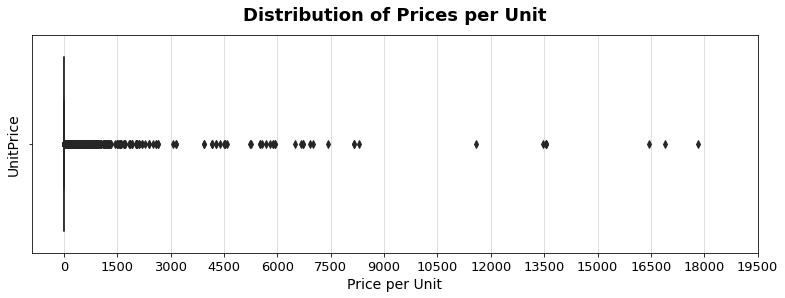

In [37]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=ecom['UnitPrice'], color='teal')

ticks = np.arange(0, 20000, 1500)
plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Prices per Unit", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Price per Unit', fontsize=14)
plt.ylabel("UnitPrice", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

This looks a way better, now I would find out real product's price range

In [38]:
# Let's see the most outlyers descriptions
ecom[ecom['UnitPrice']>3000].StockCode.unique()

array(['AMAZONFEE', 'POST', 'M', 'DOT'], dtype=object)

So again we can see that these are either fees, post charges or manual operations. As the analysis is about the products, I would delete post charges as well.

In [39]:
# Creating a table without post charges and manual operations
post=ecom[ecom['UnitPrice']>3000].StockCode.unique().tolist()
print(ecom.shape)
prod=ecom[~(ecom['StockCode'].isin(post))]
print(prod.shape)

(531689, 7)
(529127, 7)


In [40]:
# Let's see the most outlyers descriptions
print(prod[prod['UnitPrice']>500].StockCode.unique())
print(prod[prod['UnitPrice']>500].Description.unique())

['BANK CHARGES' 'D' 'S' 'CRUK']
['Bank Charges' 'Discount' 'SAMPLES' 'CRUK Commission']


Even more than 500 we can see no products, but discounts, charges, commission and samples

In [41]:
print(prod.shape)
prod=prod[~(prod['StockCode'].isin(prod[prod['UnitPrice']>500].StockCode.unique().tolist()))]
print(prod.shape)

(529127, 7)
(528935, 7)


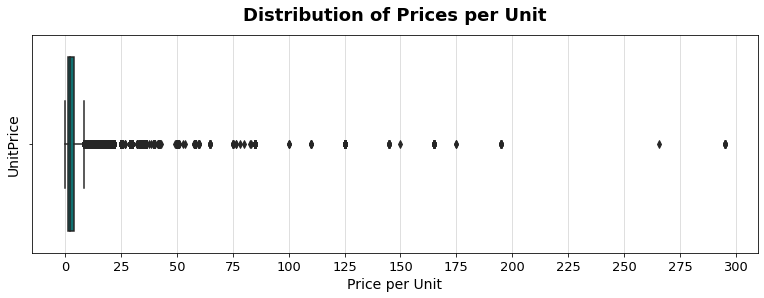

In [42]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=prod['UnitPrice'], color='teal')

ticks = np.arange(0, 325, 25)
plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Prices per Unit", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Price per Unit', fontsize=14)
plt.ylabel("UnitPrice", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

Real product price range is between zero and 300, with most products below 30. Looks like now we can find the most expensive items

In [43]:
# Checkin what products are above 200
prod[prod['UnitPrice']>200]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
4840,536835,22655,VINTAGE RED KITCHEN CABINET,2018-11-30 18:06:00,295.0,1,13145.0
31678,539080,22655,VINTAGE RED KITCHEN CABINET,2018-12-14 08:41:00,295.0,1,16607.0
35333,C539438,22655,VINTAGE RED KITCHEN CABINET,2018-12-15 15:11:00,295.0,-1,16607.0
50671,540647,22655,VINTAGE RED KITCHEN CABINET,2019-01-08 14:57:00,295.0,1,17406.0
50708,C540652,22655,VINTAGE RED KITCHEN CABINET,2019-01-08 15:04:00,265.5,-1,17406.0
81315,543253,22655,VINTAGE RED KITCHEN CABINET,2019-02-02 15:32:00,295.0,1,14842.0
85636,C543632,22655,VINTAGE RED KITCHEN CABINET,2019-02-08 16:22:00,295.0,-1,14842.0
116779,546480,22656,VINTAGE BLUE KITCHEN CABINET,2019-03-12 11:38:00,295.0,1,13452.0
131693,547814,22656,VINTAGE BLUE KITCHEN CABINET,2019-03-23 14:19:00,295.0,1,13452.0
168389,551393,22656,VINTAGE BLUE KITCHEN CABINET,2019-04-26 12:22:00,295.0,1,14973.0


In [44]:
# Deleting rows with cancelations and canceled orders
prod = prod.drop([31678 , 35333, 50671, 50708, 81315, 85636])
prod[prod['UnitPrice']>200]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID
4840,536835,22655,VINTAGE RED KITCHEN CABINET,2018-11-30 18:06:00,295.0,1,13145.0
116779,546480,22656,VINTAGE BLUE KITCHEN CABINET,2019-03-12 11:38:00,295.0,1,13452.0
131693,547814,22656,VINTAGE BLUE KITCHEN CABINET,2019-03-23 14:19:00,295.0,1,13452.0
168389,551393,22656,VINTAGE BLUE KITCHEN CABINET,2019-04-26 12:22:00,295.0,1,14973.0
202569,554836,22655,VINTAGE RED KITCHEN CABINET,2019-05-24 16:25:00,295.0,1,13015.0


So VINTAGE RED KITCHEN CABINET and VINTAGE BLUE KITCHEN CABINET are the most expensive items listed

In [45]:
print(prod[prod['UnitPrice']>100]['StockCode'].unique())
print(prod[prod['UnitPrice']>100]['Description'].unique())

['22827' '22655' '22828' '22826' '22656' '22823' 'C2']
['RUSTIC  SEVENTEEN DRAWER SIDEBOARD' 'VINTAGE RED KITCHEN CABINET'
 'REGENCY MIRROR WITH SHUTTERS' 'LOVE SEAT ANTIQUE WHITE METAL'
 'VINTAGE BLUE KITCHEN CABINET' 'CHEST NATURAL WOOD 20 DRAWERS' 'CARRIAGE']


As well as:
- RUSTIC  SEVENTEEN DRAWER SIDEBOARD
- VINTAGE RED KITCHEN CABINET
- REGENCY MIRROR WITH SHUTTERS
- LOVE SEAT ANTIQUE WHITE METAL
- VINTAGE BLUE KITCHEN CABINET
- CHEST NATURAL WOOD 20 DRAWERS

In [46]:
# Deleting another carriage from table with products
print(prod.shape)
prod=prod[~(prod['StockCode']=='C2')]
print(prod.shape)

(528929, 7)
(528785, 7)


In [47]:
print('There are only', prod[prod['UnitPrice']>30]['StockCode'].nunique(), 'items with price more than 30')
print('There are', prod[prod['UnitPrice']<=30]['StockCode'].nunique(), 'items with price equal or less than 30')
print('There are',
      prod[(prod['UnitPrice']<1)&(prod['UnitPrice']!=0)]['StockCode'].nunique(), 
      'items with price less than 1 but not equal to zero')
print('Minimum price is', prod['UnitPrice'].min())
print('There are', prod[prod['UnitPrice']==0]['StockCode'].nunique(), 'items with price equal to 0')
print()
print(prod[prod['UnitPrice']>30]['StockCode'].unique())

There are only 52 items with price more than 30
There are 3936 items with price equal or less than 30
There are 1301 items with price less than 1 but not equal to zero
Minimum price is 0.0
There are 1303 items with price equal to 0

['22827' '22803' '22769' '22847' '22503' '22946' '22947' '21769' '22655'
 '84963A' '22833' '21359' '84078A' '22802' '22849' '22797' '22846' '84352'
 '21686' '22828' '22824' '22826' '84816' '22656' '22509' '22929' '21275'
 'gift_0001_40' '22823' '22606' '85161' 'gift_0001_50' '20785' '22848'
 '84632' '22764' '22783' '23253' '23064' '22761' '84616' '21473' '22504'
 '21277' '21476' '17003' '22016' '84963B' '23462' '23485' '23486' '22423']


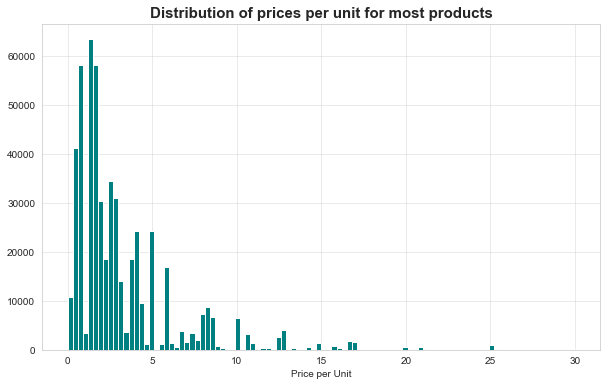

In [48]:
# Cheking most values distribution
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.hist(prod['UnitPrice'], bins=100, range=(0, 30), color='teal')

plt.title('Distribution of prices per unit for most products', fontsize=15, fontweight="bold")
plt.xlabel('Price per Unit')
plt.grid(alpha=.5)
plt.show()

- So there are only 52 items with price more than 30
- Most prices are less than 30 (3915 items), among them 33% of items (1301) are less than 1, but not equal to zero
- There are 662 items with price equal to 0
- Major items have prices above 6

VINTAGE RED KITCHEN CABINET and VINTAGE BLUE KITCHEN CABINET are the most expensive items listed. As well as:
- RUSTIC SEVENTEEN DRAWER SIDEBOARD
- VINTAGE RED KITCHEN CABINET
- REGENCY MIRROR WITH SHUTTERS
- LOVE SEAT ANTIQUE WHITE METAL
- VINTAGE BLUE KITCHEN CABINET
- CHEST NATURAL WOOD 20 DRAWERS

I can see that there are not many expensive items sold, though cheap items, with price range 0-2.5 are the most popular

### Price range categories <a class="anchor" id="step3-4"></a>  
[Go back to the Contents](#contents)

According to price range analysis I would use these percentiles to divide items into price categories:

In [49]:
print("25th percentile:", 
       np.percentile(prod['UnitPrice'], 25))
print("50th percentile:", 
       np.percentile(prod['UnitPrice'], 50))
print("75th percentile:", 
       np.percentile(prod['UnitPrice'], 75))
print("95th percentile:", 
       np.percentile(prod['UnitPrice'], 95))
print("99th percentile:", 
       np.percentile(prod['UnitPrice'], 99))

25th percentile: 1.25
50th percentile: 2.08
75th percentile: 4.13
95th percentile: 9.95
99th percentile: 16.63


In [50]:
def price_cat(price):
    if price == 0:
        return 'zero'
    if 0 < price <= 1.25:
        return 'low'
    if 1.25 < price <= 2.08:
        return 'average low'
    if 2.08 < price <= 4.13:
        return 'average'
    if 4.13 < price <= 9.95:
        return 'average high'
    if 9.95 < price <= 16.63:
        return 'high'
    return 'very high'

prod['PriceGroup'] = prod['UnitPrice'].apply(price_cat)
prod['PriceGroup'].value_counts()

low             160310
average         138221
average low     102825
average high    102003
high             18143
very high         4903
zero              2380
Name: PriceGroup, dtype: int64

According to price distribution and percentiles found above, I've divided all prices to these categories:
- zero price, 2380 items ordered
- low (below 1.25), 160310 items ordered
- average low (between 1.25 and 2.08), 102825 items ordered
- average (between 2.08 and 4.13), 138221 items ordered
- average high (between 4.13 and 9.95), 102003 items ordered
- high (between 9.95 and 16.63), 18143 items ordered
- very high (above 16.63), 4903 items ordered

Most items sold are in low price category

### Products quantity and it's distribution <a class="anchor" id="step3-10"></a>  
[Go back to the Contents](#contents)

In [51]:
prod['Quantity'].describe()

count    528785.000000
mean          9.771764
std         220.751765
min      -80995.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

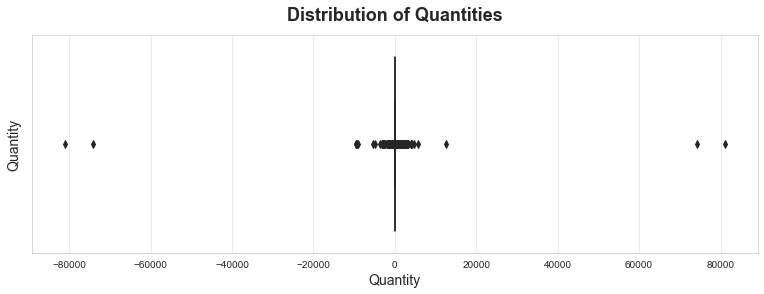

In [52]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=prod['Quantity'], color='teal')

#ticks = np.arange(-81000, 81000, 1000)
#plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Quantities", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

As with prices, we can see several outlyers and as they are simmetrical, I can say that these are canceled orders. Let's check these orders.

In [53]:
prod[(prod['Quantity']>9000)|(prod['Quantity']<-5000)]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID,PriceGroup
4166,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,2018-11-30 14:23:00,0.03,-9360,15838.0,low
60520,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,2019-01-16 10:01:00,1.04,74215,12346.0,low
60525,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,2019-01-16 10:17:00,1.04,-74215,12346.0,low
113854,546152,72140F,throw away,2019-03-07 17:25:00,0.00,-5368,NaN,zero
222062,556687,23003,Printing smudges/thrown away,2019-06-12 10:36:00,0.00,-9058,NaN,zero
222063,556690,23005,printing smudges/thrown away,2019-06-12 10:37:00,0.00,-9600,NaN,zero
222064,556691,23005,printing smudges/thrown away,2019-06-12 10:37:00,0.00,-9600,NaN,zero
492998,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,2019-11-23 15:57:00,0.00,12540,13256.0,zero
530224,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",2019-12-07 09:15:00,2.08,80995,16446.0,average low
530225,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",2019-12-07 09:27:00,2.08,-80995,16446.0,average low


Not only canceled orders but write-offs as well are outliers, so I'll remove them

In [54]:
# Deleting outlyers
prod = prod.drop(prod[(prod['Quantity']>9000)|(prod['Quantity']<-5000)].index.tolist())

# Checking zero price orders
len(prod[prod['PriceGroup']=='zero'])

2375

Looks like most quantity ordered items were canceled, but as well there are zero price items again and looks like 12540 positions is not a gift, so there should be another reason for zero price, may be cancelations or write-offs.

In [55]:
# Cheking if zero price orders are mostly made with no user id
prod[prod['PriceGroup']=='zero']['CustomerID'].unique()

array([   nan, 12647., 16560., 14911., 13081., 15107., 17560., 13239.,
       13113., 14410., 12457., 17667., 12415., 16818., 12507., 14646.,
       16133., 15804., 18059., 14110., 12431., 13014., 13985., 15602.,
       12444.])

Most of such items had no customer id

In [56]:
# Checking how many positions was in the orders, where zero price items were
zero_price_order=prod[prod['PriceGroup']=='zero']['InvoiceNo'].tolist()
zero_invoice=(prod[prod['InvoiceNo'].isin(zero_price_order)]
         .groupby('InvoiceNo')['UnitPrice']
         .count().reset_index()
         .sort_values(by='UnitPrice', ascending=False))

print('Orders with zero price items, amount:',len(zero_invoice))
print('Zero price orders with only zero price position:',len(zero_invoice[zero_invoice['UnitPrice']==1]))

Orders with zero price items, amount: 2026
Zero price orders with only zero price position: 1972


97% of orders, where zero price position was, consisted only of this item.

In [57]:
# Checking if such orders had customer id
zeros=zero_invoice[zero_invoice['UnitPrice']==1]['InvoiceNo'].tolist()
prod[prod['InvoiceNo'].isin(zeros)]['CustomerID'].unique()

array([   nan, 17560.])

Looks like only 1 customer had zero price orders, which look more like a cancelation than an order and all other zero price orders that have no customers id looks more like write-offs, so I would delete such orders.

In [58]:
# Deleting zero price orders with no customer id
print(prod.shape)
prod=prod[~((prod['UnitPrice']==0)&(prod['CustomerID'].isnull()))]
print(prod.shape)
print('Zero price items:',len(prod[prod['PriceGroup']=='zero']))

(528775, 8)
(526433, 8)
Zero price items: 33


At this point I would divide the data into 2 tables: orders and cancelations to analyse them separetly

In [59]:
c=prod[prod.InvoiceNo.str.startswith('C')]
o=prod[~(prod.InvoiceNo.str.startswith('C'))]
print('Total:',prod.shape)
print('Cancelations:',c.shape)
print('Orders:',o.shape)

Total: (526433, 8)
Cancelations: (8629, 8)
Orders: (517804, 8)


1.6% of all items are canceled items

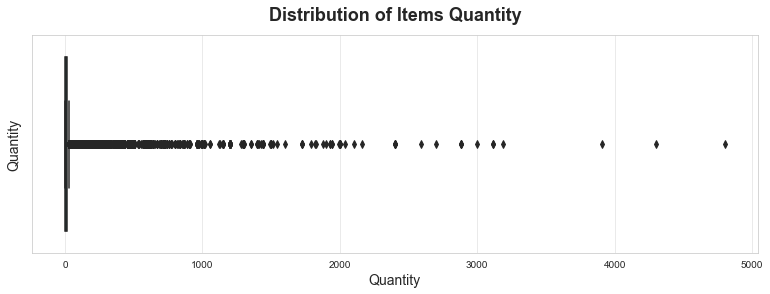

In [60]:
# Making a boxplot
plt.figure(figsize=(13,4))
sns.boxplot(x=o['Quantity'], color='teal')

#ticks = np.arange(-81000, 81000, 1000)
#plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Items Quantity", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [61]:
print("95th percentile of orders quantity:", 
       np.percentile(o['Quantity'], 95))
print("99th percentile of orders quantity:", 
       np.percentile(o['Quantity'], 99))
print('Amount of items ordered more than 100 positions per order:', o[o['Quantity']>100]['StockCode'].nunique())

95th percentile of orders quantity: 30.0
99th percentile of orders quantity: 100.0
Amount of items ordered more than 100 positions per order: 1184


Most products were ordered in quantity 30 or less, there are also 4% of items that were ordered from 30 to 100 positions per order and 1184 unique items, which make 1% that were ordered more than 100 positions per order. Though we can see that really far lying outliers starts above 700-800 positions.

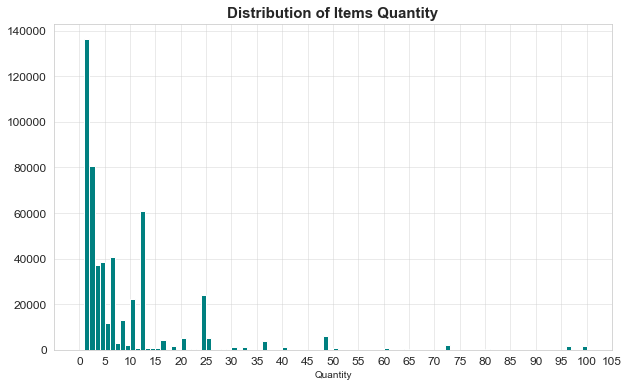

In [62]:
# Cheking most values distribution
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.hist(o['Quantity'], bins=100, range=(0, 100), color='teal')

ticks = np.arange(0, 110, 5)
plt.xticks(ticks, fontsize=12)
plt.yticks(fontsize=12)

plt.title('Distribution of Items Quantity', fontsize=15, fontweight="bold")
plt.xlabel('Quantity')
plt.grid(alpha=.5)
plt.show()

The most frequently ordered amount is 1, though we can see that the major positions are ordered in amount of 1 to 12

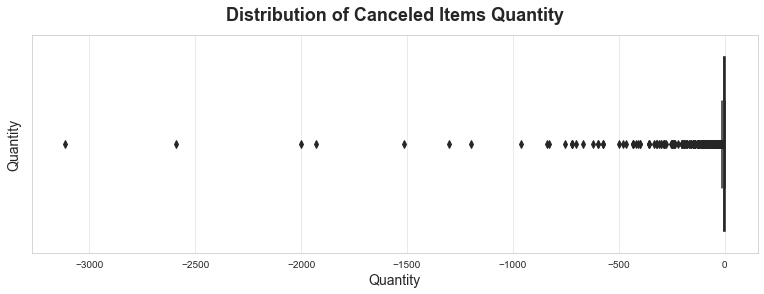

In [63]:
# Checking distribution of canceled items
plt.figure(figsize=(13,4))
sns.boxplot(x=c['Quantity'], color='teal')

#ticks = np.arange(-81000, 81000, 1000)
#plt.xticks(ticks, fontsize=13)

# Decoration
plt.title("Distribution of Canceled Items Quantity", fontsize=18, fontweight="bold", pad=15)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [64]:
print("5th percentile of orders quantity:", 
       np.percentile(c['Quantity'], 5))
print("1st percentile of orders quantity:", 
       np.percentile(c['Quantity'], 1))
print('Amount of items canceled more than 180 positions per order:', c[c['Quantity']<-180]['StockCode'].nunique())

5th percentile of orders quantity: -36.0
1st percentile of orders quantity: -180.0
Amount of items canceled more than 180 positions per order: 76


Most cancelations were made in amount of 36 positions or less, nearly all cancelations were made for amounts within 180 positions, though we can see that there are some very far lying outliers that starts with amount of 250.

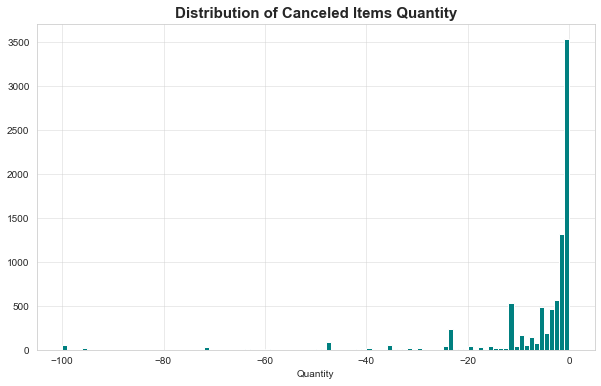

In [65]:
# Cheking most values distribution
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.hist(c['Quantity'], bins=100, range=(-100, 0), color='teal')

plt.title('Distribution of Canceled Items Quantity', fontsize=15, fontweight="bold")
plt.xlabel('Quantity')
plt.grid(alpha=.5)
plt.show()

Top frequently canceled items are in amount of 1, though major cancelations are within 1 to 10 positions.

### Product categories <a class="anchor" id="step3-7"></a>  
[Go back to the Contents](#contents)

In [66]:
# Checking most frequently used words
Lem = WordNetLemmatizer()
queries = prod['Description'].unique()

# Descriptions into words:
splitwords = [nltk.word_tokenize(str(query)) for query in queries]

# Converting nested list to a list:
word_list = []
for sublist in splitwords:
    for item in sublist:
        word_list.append(item)

# Lemmanization
lemmas = [Lem.lemmatize(w, pos = 'n') for w in word_list]

#Counting how many words we have
counter = Counter(lemmas)

# Checking those, that were used more than once
[w for w in word_list if counter[w] > 2][:10]

['WHITE',
 'HANGING',
 'HEART',
 'T-LIGHT',
 'HOLDER',
 'WHITE',
 'METAL',
 'LANTERN',
 'CREAM',
 'CUPID']

In [67]:
# Checking in wich queries some of them appear to see the pattern:
matches = []
for query in queries:
     if 'HEART' in query and query not in matches:
            matches.append(query) 
matches.sort()
matches[:10]

['3 BLACK CATS W HEARTS BLANK CARD',
 '3 HEARTS HANGING DECORATION RUSTIC',
 '3 TIER SWEETHEART GARDEN SHELF',
 '36 FOIL HEART CAKE CASES',
 '3D HEARTS  HONEYCOMB PAPER GARLAND',
 '6 CHOCOLATE LOVE HEART T-LIGHTS',
 '72 SWEETHEART FAIRY CAKE CASES',
 'ALPHABET HEARTS STICKER SHEET',
 'ALUMINIUM HEART',
 'ALUMINIUM STAMPED HEART']

In [68]:
# Creating lists of key words for each category

# Garden
Garden=['GARDEN', 'HERB','PLANT','GNOME','GLOVES']

# Kitchen and Dining
Kitchen=['KITCHEN','CAKESTAND','CAKE','BAKING','JAR','PLATE','DISH','BOTTLE','CERAMIC','BOWL','NAPKIN',
         'FOOD','OVEN','SPOON','LADLE','POT','PAN','CUP','SPOONS','RECIPE','DISH','FRUITBOWL',
         'MUG','TEA','CUTLERY','TRAY','LUNCH','TINS','DINNER','DISH','DINER','PICNIC','FRUIT','CAKES',
         'BREAKFAST','NAPKINS','BISCUIT','MOULD','COASTER','SAUCER','CONTAINER','PORCELAIN','COOKIE','PIZZA',
         'TOAST','CUTTERS','BOWLS','SALAD','FORK','TEAPOT','SPOONS','CUPCAKE','CHOPSTICKS','MICROWAVE',
         'COOKING','SQUEEZER','PLACEMAT']

# Accessories
Accessories=['NECKLACE', 'NECKL', 'BAG', 'CHARMS', 'CHARM','EARRINGS', 'JEWELLERY', 'BEADED', 
             'PURSE', 'BRACELET', 'POCKET','HAIR', 'PATCHES','HANDBAG','LUGGAGE','CHAIN','COMB',
             'SUNGLASSES','PASSPORT','KEY','KEYRING','RING','SCARF','PENCILS','TRAVEL','PHONE','WALLET',
             'TOTE','BROOCH','COSMETIC','NECKLACE+BRACELET','BACKPACK','HAIRBAND','LIPSTICK','CARDHOLDER',
             'HEADPHONES','UMBRELLA','PENCIL','HAT']

# Furniture
Furniture=['CHEST','SHELF','CABINET','TABLE','DRAWERS','SEAT','MIRROR']

# Home and Living
Home=['CANDLE','CANDLESTICK','CANDLEHOLDER','T-LIGHT','FRAME','DOORSTOP','DOORBELL','DOORMAT',
      'HOLDER','BOOK','NOTEBOOK','HOOK','ORGANISER','HANGER','CHALKBOARD','BUCKET','ART','BASKET','RACK',
      'WIRE','VASE','LANTERN','CLOCK','CUSHION','HOME','STORAGE','DOOR','KNOB','BOXES','LIGHT','LAMP','SOAP',
      'CURTAIN','BOX','ALARM','TOWELS','BATH','DOORKNOB','LAUNDRY','SHOWER','BANK','TOWEL','COAT']

# Multipack
Multipack=['SET','PACK','ASSORTED','SET/6','SET/4','SET/3','SET/10','S/3','SET/20','SET/5','SET/12',
           'SET/9','PACK/12','S/12']

# Kids
Kids=['CHILDRENS','CHILDREN','KIDS','CHILDHOOD','NURSERY','TOY','CHILDS','DINOSAUR','DOLL','BABY','TEDDY',
      'BOYS','SCHOOL','SHARK']


# Creating function to organise items by group
def product_group(description):
    
    # Garden
    for w in Garden:
        if w in description:
            return 'Garden'
    
    # Christmas
    if 'CHRISTMAS' in description:
        return 'Christmas'
    
    # Vintage
    if 'VINTAGE' in description:
        return 'Vintage'
    
    # Kids
    for w in Kids:
        if w in description:
            return 'Kids'
        
    # Multipack
    for w in Multipack:
        if w in description:
            return 'Multipack'
        
    # Furniture
    for w in Furniture:
        if w in description:
            return 'Furniture'
    
    # Accessories
    for w in Accessories:
        if w in description:
            return 'Accessories'
        
    # Kitchen and Dining
    for w in Kitchen:
        if w in description:
            return 'Kitchen'
        
    # Home and Living
    for w in Home:
        if w in description:
            return 'Home'
    
    # Decorations, Crafts and Gifts
    return 'Decorations'

In [69]:
prod['Category'] = prod['Description'].apply(product_group)

#To check if I covered all of the items:
print(len(prod['Description']))
print(len(prod['Category']))
print()
print(prod['Category'].value_counts())

526433
526433

Home           103658
Kitchen         99929
Decorations     79378
Multipack       73731
Accessories     71052
Vintage         26901
Kids            26332
Christmas       24496
Garden          12393
Furniture        8563
Name: Category, dtype: int64


In [70]:
# Checking the "rest" category
prod[prod['Category']=='Decorations']['Description'].unique()[:10]

array(['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT',
       "POPPY'S PLAYHOUSE BEDROOM ", 'LOVE BUILDING BLOCK WORD',
       'STARS GIFT TAPE ', 'MINI JIGSAW CIRCUS PARADE ',
       'MINI JIGSAW SPACEBOY', 'EDWARDIAN PARASOL RED',
       'CHARLIE & LOLA WASTEPAPER BIN FLORA', 'AIRLINE LOUNGE,METAL SIGN'],
      dtype=object)

In [71]:
# Deleting not items found
not_items=['*USB Office Mirror Ball','amazon sales','?','Dotcomgiftshop Gift Voucher £40.00','Found',
 'Dotcomgiftshop Gift Voucher £50.00','Dotcomgiftshop Gift Voucher £30.00','Dotcomgiftshop Gift Voucher £20.00',
 'Dotcomgiftshop Gift Voucher £10.00','wrongly sold (22719) barcode','rcvd be air temp fix for dotcom sit',
 'did  a credit  and did not tick ret','mailout ', 'mailout','on cargo order','incorrectly credited C550456 see 47',
 'to push order througha s stock was ', 'came coded as 20713','alan hodge cant mamage this section', 
 'Dotcomgiftshop Gift Voucher £100.00','test', 'taig adjust','allocate stock for dotcom orders ta',
 'add stock to allocate online orders', 'for online retail orders','Amazon', 'found box', 'damaged', 
 'Found in w/hse','website fixed','Lighthouse Trading zero invc incorr','michel oops','wrongly coded 20713',
 'Had been put aside.', 'High Resolution Image', 'Sale error', 'Amazon Adjustment','wrongly marked 23343', 
 'Marked as 23343', 'wrongly coded 23343','Found by jackie', 'check','wrongly marked', 'had been put aside',
 'amazon adjust', 'dotcomstock','John Lewis', 'dotcom adjust', 'check?','AMAZON','Manual']

print(prod.shape)
prod=prod[~(prod['Description'].isin(not_items))]
print(prod.shape)

(526433, 9)
(526395, 9)


In [72]:
# Deleting dots and empty fields from string's beginnig and end where they appear
prod['Description'] = prod['Description'].str.rstrip('.')
prod['Description'] = prod['Description'].str.rstrip(' ')
prod['Description'] = prod['Description'].str.lstrip(' ')

# Checking how many codes have more than 1 description after cleaning
desc_code=(prod.groupby('StockCode')['Description'].nunique()
           .reset_index().sort_values(by='Description', ascending=False))

print('Items with multiple descriptions:',len(desc_code[desc_code['Description']>1]))

# Checking example of such descriptions
prod[prod['StockCode']=='23236']['Description'].unique()

Items with multiple descriptions: 216


array(['DOILEY STORAGE TIN', 'DOILEY BISCUIT TIN',
       'STORAGE TIN VINTAGE DOILEY', 'STORAGE TIN VINTAGE DOILY'],
      dtype=object)

Looks like we got rid of most service notes and as far as such items have same code, I would stop the cleaning at this point.

In [73]:
# Creating column with total price
prod.loc[:, 'TotalPrice']=prod['UnitPrice']*prod['Quantity']
prod.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,Quantity,CustomerID,PriceGroup,Category,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2018-11-29 08:26:00,2.55,6,17850.0,average,Home,15.30
1,536365,71053,WHITE METAL LANTERN,2018-11-29 08:26:00,3.39,6,17850.0,average,Home,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2018-11-29 08:26:00,2.75,8,17850.0,average,Kitchen,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2018-11-29 08:26:00,3.39,6,17850.0,average,Kitchen,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,2018-11-29 08:26:00,3.39,6,17850.0,average,Home,20.34


In [74]:
# Extracting new dataset to csv for tableau visualisation
print(o.shape)
o_new=o[o.UnitPrice>0]
print(o_new.shape)

o_new.to_csv("ecom_orders.csv") 

(517804, 8)
(517771, 8)


### The most and the least sold products <a class="anchor" id="step3-1"></a>  
[Go back to the Contents](#contents)

In [75]:
# Deviding data again after categorisation
c=prod[prod.InvoiceNo.str.startswith('C')]
o=prod[~(prod.InvoiceNo.str.startswith('C'))]
print('Total:',prod.shape)
print('Cancelations:',c.shape)
print('Orders:',o.shape)

Total: (526395, 10)
Cancelations: (8629, 10)
Orders: (517766, 10)


In [76]:
# Checking each product's total amount
top_items=(o.groupby(['Description'])
           ['Quantity'].count().reset_index()
           .sort_values(by='Quantity', ascending=False))
print('Total items:', len(top_items))
print('Items, that were ordered 1000 times or more:', len(top_items[top_items['Quantity']>=1000]))
print('Items, that were ordered more than 500 times:', 
      len(top_items[(top_items['Quantity']>500)&(top_items['Quantity']<1000)]))
print('Items, that were ordered twice:', len(top_items[top_items['Quantity']==2]))
print('Items, that were ordered once:', len(top_items[top_items['Quantity']==1]))

Total items: 3997
Items, that were ordered 1000 times or more: 32
Items, that were ordered more than 500 times: 154
Items, that were ordered twice: 141
Items, that were ordered once: 168


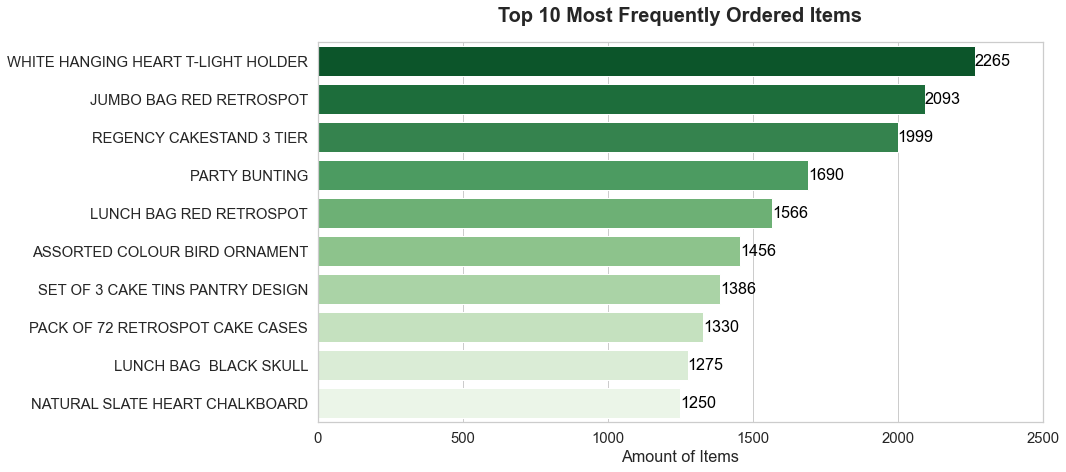

In [77]:
# Prepare Data
items_10=o['Description'].value_counts().head(10).reset_index()

sns.set_context('notebook', font_scale=1.35)
# Plot a graph
plt.figure(figsize=(13,7))

sns.barplot(x='Description',y='index', data=items_10, palette='Greens_r')

for i, v in enumerate(items_10.Description):
    plt.text(v+0.2, i, str(round(v)), color='black', va="center")

plt.title("Top 10 Most Frequently Ordered Items",fontsize=20,fontweight="bold", pad=20)
plt.ylabel('Item Name')
plt.xlabel('Amount of Items')
plt.ylabel(None)
plt.xlim(0,2500)
plt.show()

__Top 10 the most frequently ordered items:__
- WHITE HANGING HEART T-LIGHT HOLDER, 2265 orders
- JUMBO BAG RED RETROSPOT, 2039 orders
- REGENCY CAKESTAND 3 TIER, 1999 orders
- PARTY BUNTING, 1690 orders
- LUNCH BAG RED RETROSPOT, 1566 orders
- ASSORTED COLOUR BIRD ORNAMENT, 1456 orders
- SET OF 3 CAKE TINS PANTRY DESIGN, 1386 orders
- PACK OF 72 RETROSPOT CAKE CASES, 1330 orders
- LUNCH BAG BLACK SKULL, 1275 orders
- NATURAL SLATE HEART CHALKBOARD, 1250 orders

The least ordered items were ordered once and there are 197 such unique items.
There are only 32 items, that were purchased 1000 time or more.

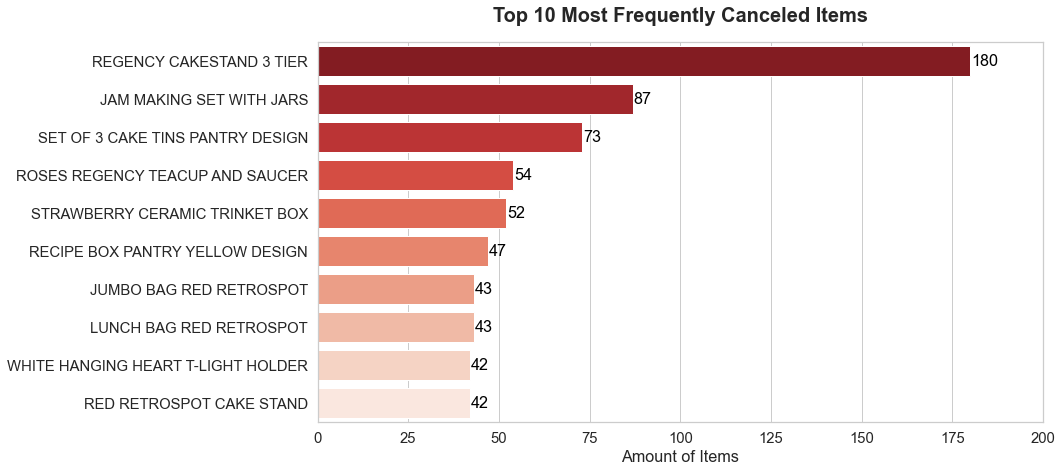

In [78]:
# Prepare Data
items_10=c['Description'].value_counts().head(10).reset_index()

sns.set_context('notebook', font_scale=1.35)
# Plot a graph
plt.figure(figsize=(13,7))

sns.barplot(x='Description',y='index', data=items_10, palette='Reds_r')

for i, v in enumerate(items_10.Description):
    plt.text(v+0.2, i, str(round(v)), color='black', va="center")

plt.title("Top 10 Most Frequently Canceled Items",fontsize=20,fontweight="bold", pad=20)
plt.ylabel('Item Name')
plt.xlabel('Amount of Items')
plt.ylabel(None)
plt.xlim(0,200)
plt.show()

That's obvious that the items, that are the most frequently sold would have the most cancelations, though we can see that the most canceled item is not the most sold and it has about 2 times more cancelations as compared to the 2nd place item.

__Top-5 most frequently canceled items__
1. REGENCY CAKESTAND 3 TIER	(180)
2. JAM MAKING SET WITH JARS	87
3. SET OF 3 CAKE TINS PANTRY DESIGN	(73)
4. ROSES REGENCY TEACUP AND SAUCER	(54)
5. STRAWBERRY CERAMIC TRINKET BOX	(52)

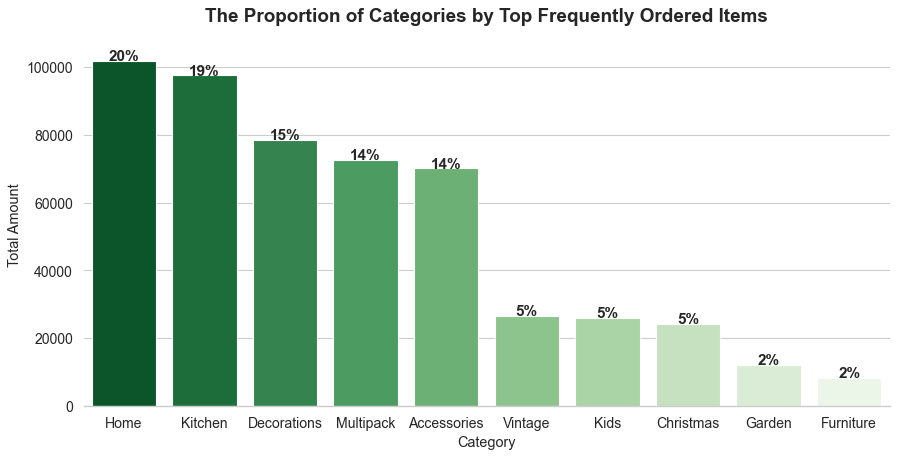

In [79]:
sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.15)

total = float(len(o))
order = o['Category'].value_counts().index

plt.figure(figsize=(13,6), dpi= 80)
ax = sns.countplot(x='Category', data=o, order=order, palette=("Greens_r"))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    ax.text(p.get_x()+p.get_width()/2., height+100, '{:.0%}'.format(height/total), ha="center", fontweight="bold")

plt.title("The Proportion of Categories by Top Frequently Ordered Items",fontsize=17,fontweight="bold", pad=20)
plt.ylabel('Total Amount', size=13)
plt.xlabel("Category", size=13)
sns.despine(left=True)
plt.show()

__Top-ordered categories__
- 20% Home and Living, which is nearly same as the second place category.
- 19% Kitchen and Dining
- 15% Decorations, Crafts and Gifts is purchased nearly as frequently as mulipack and accessories
- 14% Multipack, same as accessories
- 14% Accessories

The least frequently sold category is Furniture (2%), though it includes the most expensive items.

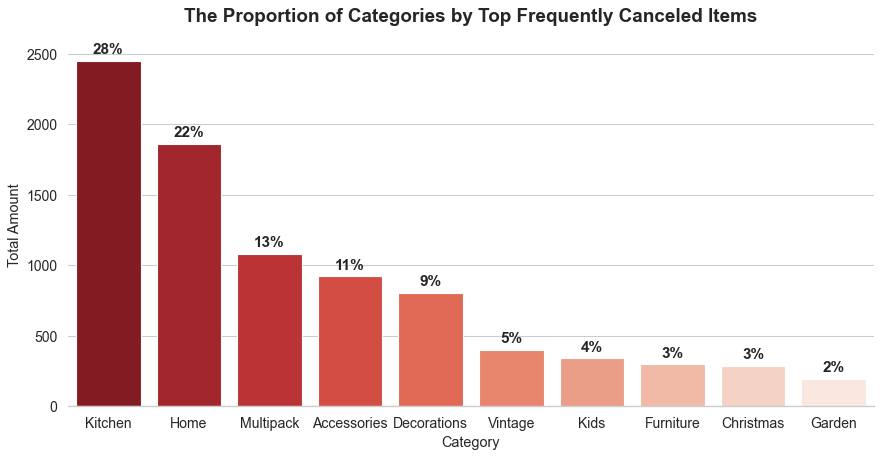

In [80]:
sns.set_context('notebook', font_scale=1.15)

total = float(len(c))
order = c['Category'].value_counts().index

plt.figure(figsize=(13,6), dpi= 80)
ax = sns.countplot(x='Category', data=c, order=order, palette=("Reds_r"))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    ax.text(p.get_x()+p.get_width()/2., height+50, '{:.0%}'.format(height/total), ha="center", fontweight="bold")

plt.title("The Proportion of Categories by Top Frequently Canceled Items",fontsize=17,fontweight="bold", pad=20)
plt.ylabel('Total Amount', size=13)
plt.xlabel("Category", size=13)
sns.despine(left=True)
plt.show()

__Top-canceled categories__
- 28% Kitchen and Dining, though it's top 2nd sold category, we can see that cancelations in this category are much higher as compared to the proportion of it's sales
- 22% Home and Living, the proportion of cancelations in this category is quite close to it's sales
- 13% Multipack, the proportion of cancelations in this category is quite close to it's sales
- 11% Accessories, the proportion of cancelations is much lower than the sales
- 9% Decorations,  the proportion of cancelations is much lower than the sales

In minor categories the proportion of cancelations is nearly same as sales, but I can note that Furniture has higher cancelations amount, while Christmas has much lower.

### Products with the most and the least quantity purchacsed <a class="anchor" id="step3-2"></a>  
[Go back to the Contents](#contents)

In [81]:
# Checking each product's total amount
top_quantity=(o.groupby(['Description'])
           ['Quantity'].sum().reset_index()
           .sort_values(by='Quantity', ascending=False))
print('Total items:', len(top_quantity))
print('Totaly sold more than 700 positions:', len(top_quantity[top_quantity['Quantity']>=700]))
print('Totaly sold only 1 position:', len(top_quantity[top_quantity['Quantity']==1]))

Total items: 3997
Totaly sold more than 700 positions: 1546
Totaly sold only 1 position: 65


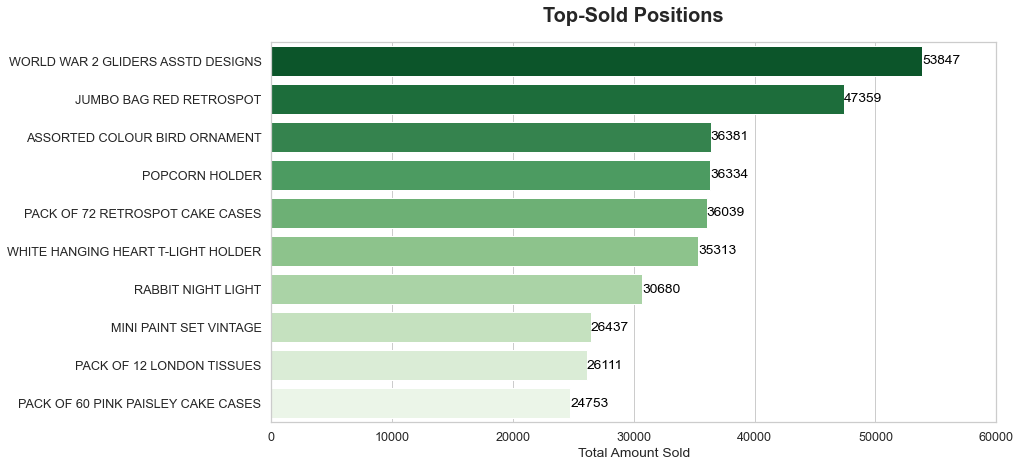

In [82]:
# Checking total positions sold

# Prepare Data
top_quantity_items=(prod.groupby(['Description'])
           ['Quantity'].sum().reset_index()
           .sort_values(by='Quantity', ascending=False).head(10))

#sns.set_context('notebook', font_scale=1.35)
sns.set_style("whitegrid")

# Plot a graph
plt.figure(figsize=(13,7))

sns.barplot(x='Quantity',y='Description', data=top_quantity_items, palette='Greens_r')

for i, v in enumerate(top_quantity_items.Quantity):
    plt.text(v+1.3, i, str(round(v)), color='black', va="center")

plt.title("Top-Sold Positions",fontsize=20,fontweight="bold", pad=20)
#plt.ylabel('Category')
plt.xlabel('Total Amount Sold')
plt.ylabel(None)
#sns.despine(left=True)
plt.xlim(0,60000)
plt.show()

With extracted cancelations, these products were sold in most quantities.

__Top-5 products with most quantity sold__
- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53847 items sold
- JUMBO BAG RED RETROSPOT, 47359 items sold
- ASSORTED COLOUR BIRD ORNAMENT, 36381 items sold
- POPCORN HOLDER, 36334 items sold
- PACK OF 72 RETROSPOT CAKE CASES, 36039 items sold

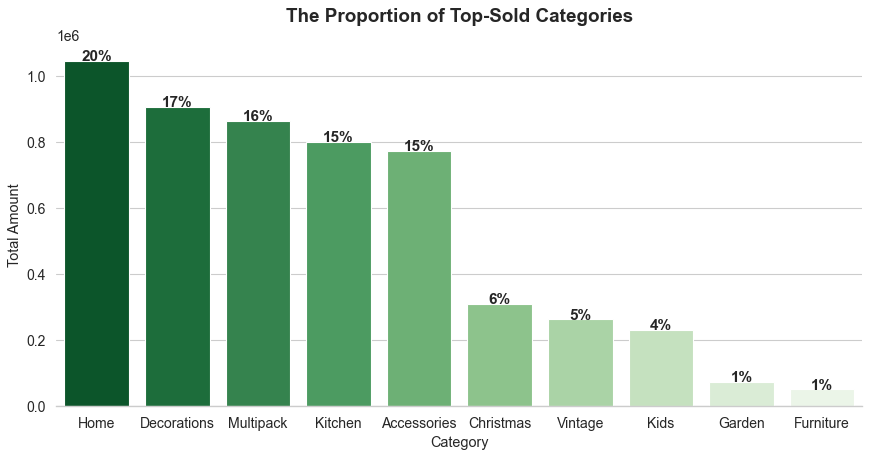

In [83]:
# Checking total positions sold

# Prepare data
top_quantity_cat=(prod.groupby(['Category'])
           ['Quantity'].sum().reset_index()
           .sort_values(by='Quantity', ascending=False))

# Set style
sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.15)

total = float(top_quantity_cat['Quantity'].sum())
order = top_quantity_cat['Category'].tolist()

# Plot
plt.figure(figsize=(13,6), dpi= 80)
ax = sns.barplot(x='Category',y='Quantity', data=top_quantity_cat, order=order, palette=("Greens_r"))
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    ax.text(p.get_x()+p.get_width()/2., height+1050, '{:.0%}'.format(height/total), ha="center", fontweight="bold")

# Decorations
plt.title("The Proportion of Top-Sold Categories",fontsize=17,fontweight="bold", pad=20)
plt.ylabel('Total Amount', size=13)
plt.xlabel("Category", size=13)
sns.despine(left=True)
plt.show()

__Most quantity sold__
- 20% Home and Living
- 17% Decorations, Crafts and Gifts
- 16% Multipack
- 15% Kitchen and Dining
- 15% Accessories

While Decorations is not the most frequently ordered category, we can see that it's very common that it's items are bought in multiple quantity.

Furniture as well as Garden, again has the least items sold.

### Seasonality <a class="anchor" id="step3-5"></a>  
[Go back to the Contents](#contents)

In [84]:
# Prepare data

# Extracting month
prod['InvoiceMonth'] = prod['InvoiceDate'].dt.month

# Creating tables for each season
winter=prod[prod['InvoiceMonth'].isin([12, 1, 2])]
spring=prod[prod['InvoiceMonth'].isin([3, 4, 5])]
summer=prod[prod['InvoiceMonth'].isin([6, 7, 8])]
autumn=prod[prod['InvoiceMonth'].isin([9, 10, 11])]

# Calculating amount of most ordered items in each category
def seasons_count(df):
    df=df.groupby(['Category'])['Quantity'].count().reset_index().sort_values(by='Quantity', ascending=False).head(5)
    return df

wint=seasons_count(winter)
sumr=seasons_count(summer)
autm=seasons_count(autumn)
spri=seasons_count(spring)

# Calculating amount of total items ordered in each category

def seasons_sum(df):
    df=df.groupby(['Category'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(5)
    return df

wint1=seasons_sum(winter)
sumr1=seasons_sum(summer)
autm1=seasons_sum(autumn)
spri1=seasons_sum(spring)

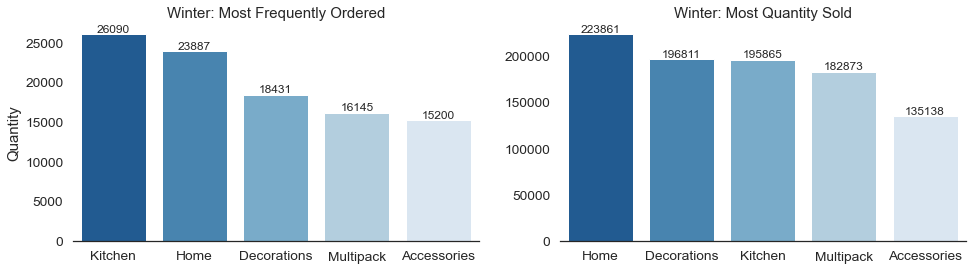

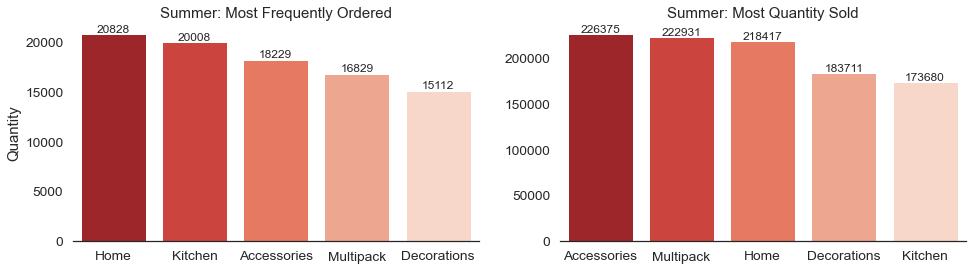

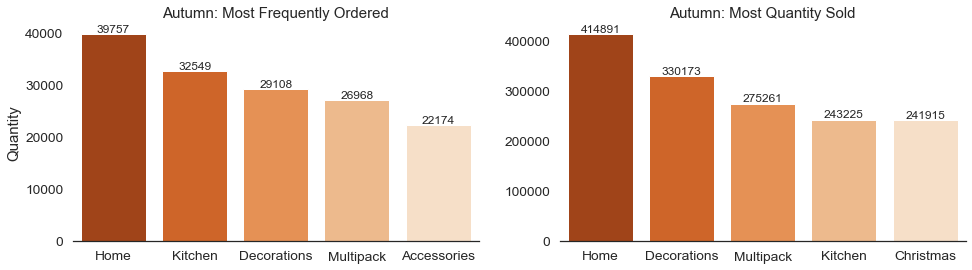

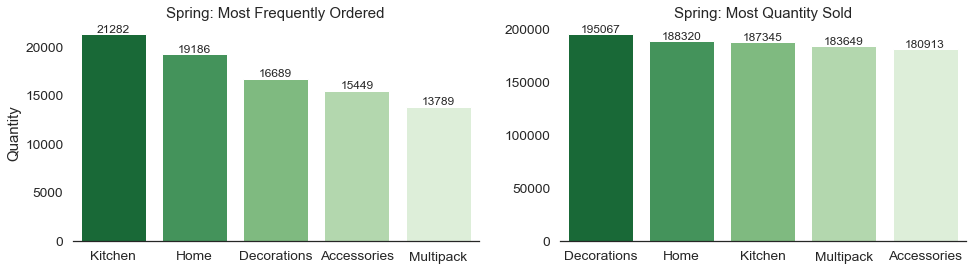

In [85]:
sns.set_context('notebook', font_scale=1.25)
sns.set_style("white")

# Plot subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 4))
fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(16, 4))
fig, (ax5,ax6) = plt.subplots(1, 2, figsize=(16, 4))
fig, (ax7,ax8) = plt.subplots(1, 2, figsize=(16, 4))

# Annotate

def annot(df,ax):
    for i, val in enumerate(df['Quantity'].values):
        ax.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

annot(wint,ax1)
annot(wint1,ax2)
annot(sumr,ax3)
annot(sumr1,ax4)
annot(autm,ax5)
annot(autm1,ax6)
annot(spri,ax7)
annot(spri1,ax8)

# Create barplots
g1=sns.barplot(y='Quantity', x='Category', data=wint, palette=("Blues_r"), ax=ax1)
g1.set(title='Winter: Most Frequently Ordered')
g1.set(xlabel=None)
sns.despine(left=True, ax=ax1)

g2=sns.barplot(y='Quantity', x='Category', data=wint1, palette=("Blues_r"), ax=ax2)
g2.set(title='Winter: Most Quantity Sold')
g2.set(xlabel=None)
g2.set(ylabel=None)
sns.despine(left=True, ax=ax2)

g3=sns.barplot(y='Quantity', x='Category', data=sumr, palette=("Reds_r"), ax=ax3)
g3.set(title='Summer: Most Frequently Ordered')
g3.set(xlabel=None)
sns.despine(left=True, ax=ax3)

g4=sns.barplot(y='Quantity', x='Category', data=sumr1, palette=("Reds_r"), ax=ax4)
g4.set(title='Summer: Most Quantity Sold')
g4.set(xlabel=None)
g4.set(ylabel=None)
sns.despine(left=True, ax=ax4)

g5=sns.barplot(y='Quantity', x='Category', data=autm, palette=("Oranges_r"), ax=ax5)
g5.set(title='Autumn: Most Frequently Ordered')
g5.set(xlabel=None)
sns.despine(left=True, ax=ax5)

g6=sns.barplot(y='Quantity', x='Category', data=autm1, palette=("Oranges_r"), ax=ax6)
g6.set(title='Autumn: Most Quantity Sold')
g6.set(xlabel=None)
g6.set(ylabel=None)
sns.despine(left=True, ax=ax6)

g7=sns.barplot(y='Quantity', x='Category', data=spri, palette=("Greens_r"), ax=ax7)
g7.set(title='Spring: Most Frequently Ordered')
g7.set(xlabel=None)
sns.despine(left=True, ax=ax7)

g8=sns.barplot(y='Quantity', x='Category', data=spri1, palette=("Greens_r"), ax=ax8)
g8.set(title='Spring: Most Quantity Sold')
g8.set(xlabel=None)
g8.set(ylabel=None)
sns.despine(left=True, ax=ax8)

plt.show()

- Kitchen and Dining is the most frequently ordered category in winter and spring, though it seems to have lots of main products, that are usually purchased in single amount
- Home and Living is very popular all year round, but the most sales we can see in autumn
- We can see that Decorations category is very popular in spring, but also in autumn and winter. Even if it's not the most frequently ordered category, it definetly has great quantity sold.
- Multipack is not the most popular category, in summer it's one of the most popular
- Accessories are very popular in summer and least popular in autumn
- Christmas is mostly popular in autumn, looks like most decorations for christmas are bought before December
- Also I can see that autumn has the most sales, while during other seasons total amounts of sales are quite stable, in autumn we can see nearly 2 times rise in sales.

In [86]:
# Checking top ordered products in each season
def top_season(df):
    df=(df.groupby(['Category','Description']).agg({'StockCode':'count','Quantity':'sum'}).reset_index()
           .sort_values(by='Quantity', ascending=False))
    df.columns=['Category', 'Description', 'TimesOrdered', 'Quantity']
    display(df.head(5))

for df in (winter, spring, summer, autumn):
    top_season(df)

,Category,Description,TimesOrdered,Quantity
2235,Home,WHITE HANGING HEART T-LIGHT HOLDER,581,10721
3180,Multipack,PACK OF 72 RETROSPOT CAKE CASES,300,9435
1340,Decorations,WORLD WAR 2 GLIDERS ASSTD DESIGNS,93,8398
280,Accessories,JUMBO BAG RED RETROSPOT,406,7991
1025,Decorations,GROW A FLYTRAP OR SUNFLOWER IN TIN,45,7123


,Category,Description,TimesOrdered,Quantity
1107,Decorations,WORLD WAR 2 GLIDERS ASSTD DESIGNS,120,17593
1822,Home,SMALL POPCORN HOLDER,276,11423
245,Accessories,JUMBO BAG RED RETROSPOT,494,11220
2697,Multipack,PACK OF 72 RETROSPOT CAKE CASES,362,10274
2581,Multipack,ASSORTED COLOURS SILK FAN,158,9861


,Category,Description,TimesOrdered,Quantity
242,Accessories,JUMBO BAG RED RETROSPOT,556,12479
2576,Multipack,ASSORTED COLOUR BIRD ORNAMENT,304,9928
1769,Home,POPCORN HOLDER,253,8773
1134,Decorations,WORLD WAR 2 GLIDERS ASSTD DESIGNS,122,8236
2583,Multipack,ASSORTED COLOURS SILK FAN,167,8101


,Category,Description,TimesOrdered,Quantity
1939,Home,POPCORN HOLDER,538,22998
1946,Home,RABBIT NIGHT LIGHT,635,22236
1241,Decorations,WORLD WAR 2 GLIDERS ASSTD DESIGNS,205,19620
263,Accessories,JUMBO BAG RED RETROSPOT,680,15669
657,Christmas,PAPER CHAIN KIT 50'S CHRISTMAS,841,14072


We can see that each season had it's own top product:
- WHITE HANGING HEART T-LIGHT HOLDER in winter
- WORLD WAR 2 GLIDERS ASSTD DESIGNS in spring
- JUMBO BAG RED RETROSPOT in summer
- POPCORN HOLDER in autumn

### Recent months top products compared to all time tops <a class="anchor" id="step3-6"></a>  
[Go back to the Contents](#contents)

In [87]:
# Function to calculate top ordered and top sold items
def top_5(df, column):
    df=(df.groupby(column).agg({'StockCode':'count','Quantity':'sum'}).reset_index()
           .sort_values(by='StockCode', ascending=False))
    df.columns=[column, 'TimesOrdered', 'Quantity']
    return df.head(5)
    
# Last 2 months data
recent=prod[prod['InvoiceDate']>'2019-10-07 00:00:00']

# Prepare data
top_recent=top_5(recent, 'Category')
top_all=top_5(o, 'Category')

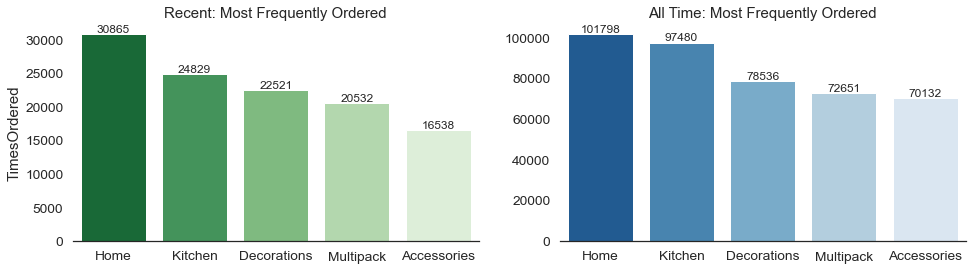

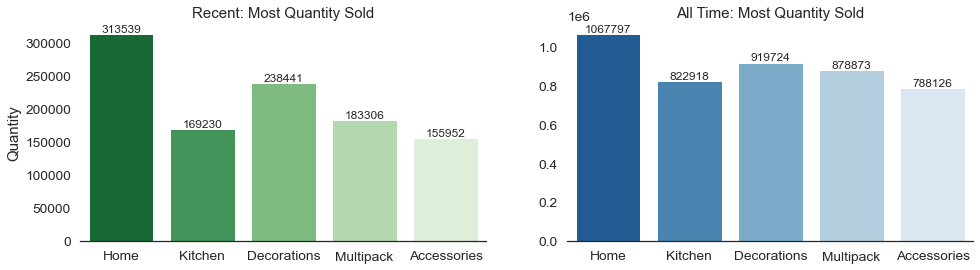

In [88]:
sns.set_context('notebook', font_scale=1.25)
sns.set_style("white")

# Plot subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 4))
fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(16, 4))

def annot(df, column, ax):
    for i, val in enumerate(df[column].values):
        ax.text(i, val, int(val), horizontalalignment='center', 
                 verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

annot(top_recent,'TimesOrdered',ax1)
annot(top_all,'TimesOrdered',ax2)
annot(top_recent,'Quantity',ax3)
annot(top_all,'Quantity',ax4)

# Create barplots
g1=sns.barplot(y='TimesOrdered', x='Category', data=top_recent, palette=("Greens_r"), ax=ax1)
g1.set(title='Recent: Most Frequently Ordered')
g1.set(xlabel=None)
sns.despine(left=True, ax=ax1)

g2=sns.barplot(y='TimesOrdered', x='Category', data=top_all, palette=("Blues_r"), ax=ax2)
g2.set(title='All Time: Most Frequently Ordered')
g2.set(xlabel=None)
g2.set(ylabel=None)
sns.despine(left=True, ax=ax2)

g3=sns.barplot(y='Quantity', x='Category', data=top_recent, palette=("Greens_r"), ax=ax3)
g3.set(title='Recent: Most Quantity Sold')
g3.set(xlabel=None)

g4=sns.barplot(y='Quantity', x='Category', data=top_all, palette=("Blues_r"), ax=ax4)
g4.set(title='All Time: Most Quantity Sold')
g4.set(xlabel=None)
g4.set(ylabel=None)

sns.despine(left=True)
plt.show()

We can see that most frequently ordered items' categories are the same for whole period and recent months as well as total quantity sold.

In [89]:
# All time best sold products and recently best sold products
top_recent_items=top_5(recent, 'Description')
top_all_items=top_5(o, 'Description')
display(top_recent_items,top_all_items)

,Description,TimesOrdered,Quantity
2061,RABBIT NIGHT LIGHT,690,25131
1820,PAPER CHAIN KIT 50'S CHRISTMAS,689,12215
1291,HOT WATER BOTTLE KEEP CALM,528,3716
1825,PAPER CHAIN KIT VINTAGE CHRISTMAS,481,5774
1359,JUMBO BAG 50'S CHRISTMAS,459,6853


,Description,TimesOrdered,Quantity
3815,WHITE HANGING HEART T-LIGHT HOLDER,2265,37891
1792,JUMBO BAG RED RETROSPOT,2093,48474
2825,REGENCY CAKESTAND 3 TIER,1999,13889
2388,PARTY BUNTING,1690,18299
1979,LUNCH BAG RED RETROSPOT,1566,19353


Though among categories there is no difference, we can see that the top products differ between whole year period and 2 recent months.

### Categories with most revenue <a class="anchor" id="step3-14"></a>  
[Go back to the Contents](#contents)

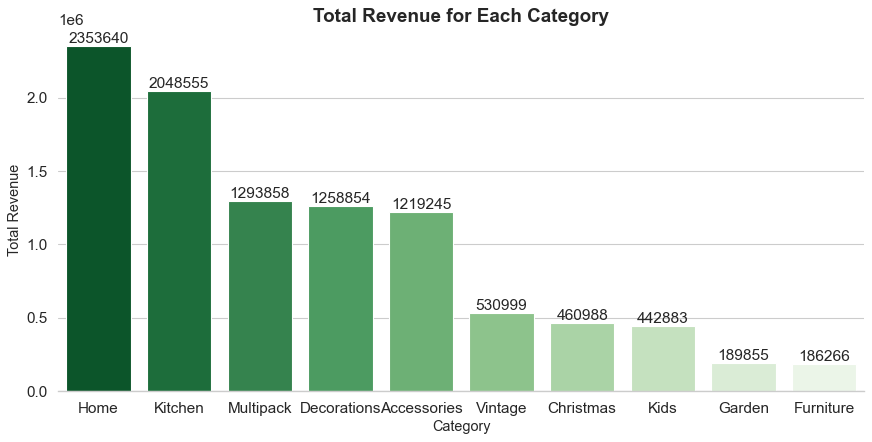

In [90]:
# Prepare data
cat_rev = o.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.25)

# Plot Bars
plt.figure(figsize=(13,6), dpi= 80)

for i, val in enumerate(cat_rev['TotalPrice'].values):
    plt.text(i, val, int(val), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

ax = sns.barplot(y='TotalPrice', x='Category', data=cat_rev, palette=("Greens_r"))

#plt.gca().set_xticklabels(nin_gen['genre'], horizontalalignment= 'right', rotation=45)
plt.title("Total Revenue for Each Category",fontsize=17,fontweight="bold")
plt.ylabel('Total Revenue', size=13)
plt.xlabel("Category", size=13)
#plt.ylim(0,8000)
sns.despine(left=True)
plt.show()

Most revenue was brought by categories:
1. Home and Living, 2,353,640
2. Kitchen and Dining, 2,048,555
3. Multipack, 1,293,858
4. Decorations, Crafts and Gifts, 1,258,854
5. Accessories, 1,219,245

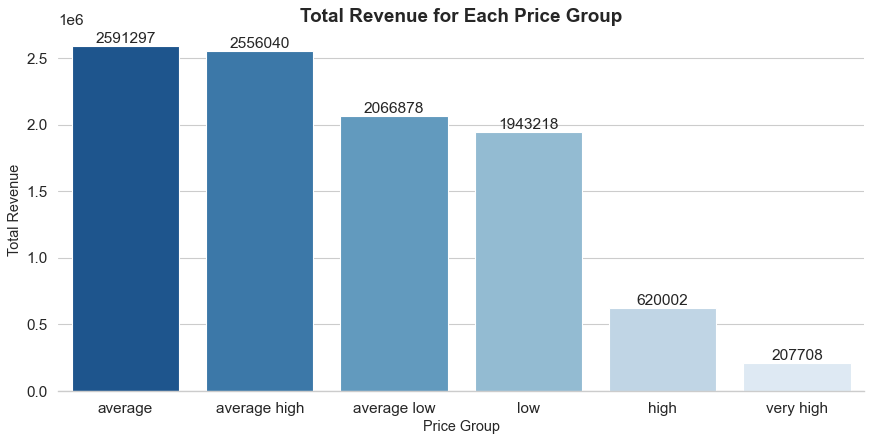

In [91]:
# Prepare data
gr_rev = o.groupby('PriceGroup')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
gr_rev=gr_rev.drop(6)

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.25)

# Plot Bars
plt.figure(figsize=(13,6), dpi= 80)

for i, val in enumerate(gr_rev['TotalPrice'].values):
    plt.text(i, val, int(val), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

ax = sns.barplot(y='TotalPrice', x='PriceGroup', data=gr_rev, palette=("Blues_r"))

#plt.gca().set_xticklabels(nin_gen['genre'], horizontalalignment= 'right', rotation=45)
plt.title("Total Revenue for Each Price Group",fontsize=17,fontweight="bold")
plt.ylabel('Total Revenue', size=13)
plt.xlabel("Price Group", size=13)
#plt.ylim(0,8000)
sns.despine(left=True)
plt.show()

Most revenue was brought by these price groups:
1. Average, 2,591,297
2. Average High, 2,556,040
3. Average Low, 2,066,878
4. Low, 1,943,218

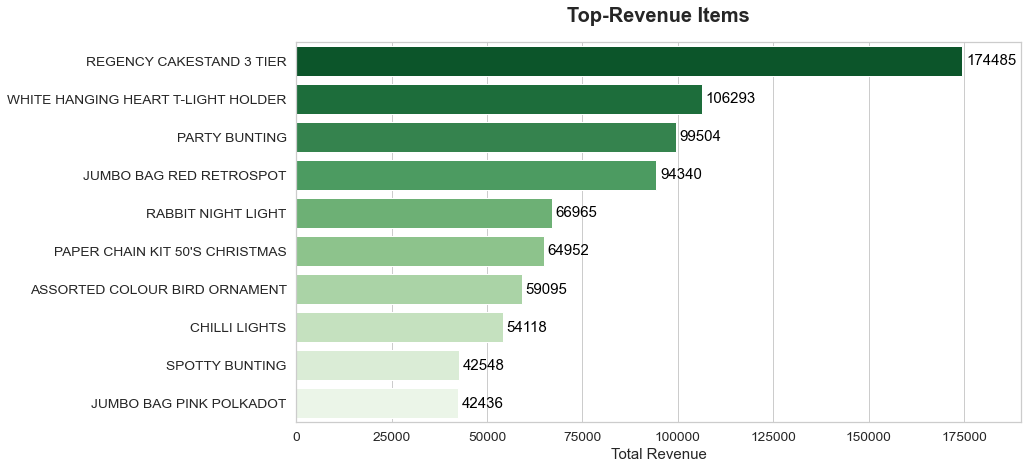

In [92]:
# Checking total revenue top positions

# Prepare Data
top_rev_items=(o.groupby(['Description'])
           ['TotalPrice'].sum().reset_index()
           .sort_values(by='TotalPrice', ascending=False).head(10))

#sns.set_context('notebook', font_scale=1.35)
sns.set_style("whitegrid")

# Plot a graph
plt.figure(figsize=(13,7))

sns.barplot(x='TotalPrice',y='Description', data=top_rev_items, palette='Greens_r')

for i, v in enumerate(top_rev_items.TotalPrice):
    plt.text(v+1000, i, str(round(v)), color='black', va="center")

plt.title("Top-Revenue Items",fontsize=20,fontweight="bold", pad=20)
#plt.ylabel('Category')
plt.xlabel('Total Revenue')
plt.ylabel(None)
#sns.despine(left=True)
plt.xlim(0,190000)
plt.show()

__Top-Revenue Items__
- REGENCY CAKESTAND 3 TIER, 174484.74
- WHITE HANGING HEART T-LIGHT HOLDER, 106292.77
- PARTY BUNTING, 99504.33
- JUMBO BAG RED RETROSPOT, 94340.05
- RABBIT NIGHT LIGHT, 66964.99

### Categories frequently purchased together <a class="anchor" id="step3-12"></a>  
[Go back to the Contents](#contents)

In [93]:
# Calculating amount of categories in each order
cat_piv=o.pivot_table(index='InvoiceNo', columns='Category', values='Quantity', aggfunc='sum')
cat_piv['CatCount']=cat_piv.count(axis=1)
cat_piv=cat_piv.reset_index()

print('All orders:',len(cat_piv))
print('Orders with more than 1 category:',len(cat_piv[cat_piv['CatCount']>1]))
print('Maximum categories in 1 order:',cat_piv['CatCount'].max())
print('Orders with more than 8 categories:',len(cat_piv[cat_piv['CatCount']>8]))

All orders: 19768
Orders with more than 1 category: 17601
Maximum categories in 1 order: 10
Orders with more than 8 categories: 1848


Most orders include 1 or more categories, while having more than 8 categories in one order is rare.

In [94]:
# Categories most bought on it's own
one_c=cat_piv[cat_piv['CatCount']==1]['InvoiceNo'].tolist()
o[o['InvoiceNo'].isin(one_c)]['Category'].value_counts()

Home           1030
Kitchen         713
Decorations     524
Accessories     506
Multipack       381
Vintage         112
Christmas       104
Kids            101
Furniture        62
Garden           40
Name: Category, dtype: int64

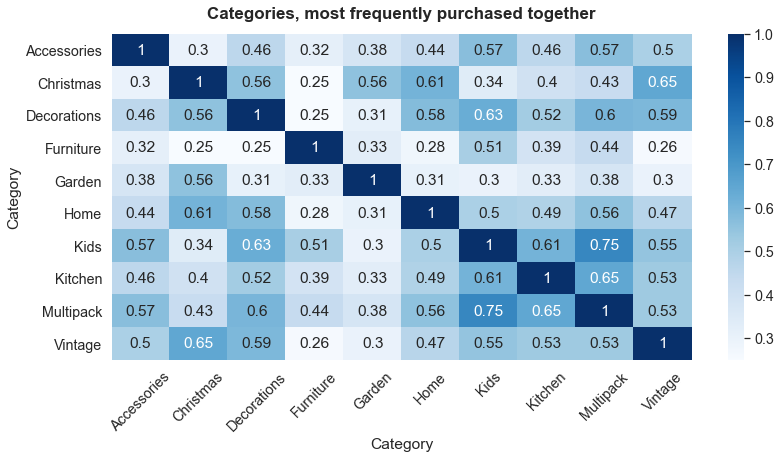

In [95]:
# Prepare data
cat_only=cat_piv.drop(['InvoiceNo', 'CatCount'], axis=1)
cat_corr=cat_only.corr()   
cat_corr=cat_corr.apply(lambda x: round(x, 2))

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,6))
sns.heatmap(cat_corr, annot=True, cmap="Blues", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Categories, most frequently purchased together",fontsize=17,fontweight="bold",pad=15)
plt.show()

__Categories, most frequently purchased together__
- Kids and Multipack are most frequently purchased together
- Kitchen and Multipack as well as Christmas and Vintage are the second most popular categories purchased together
- 3d most popular purchased together are Kids and Decorations
- Also very popular are Home and Christmas, Kitchen and Kids, Decorations and Multipack

__Each category is most commonly purchased with:__
- Accessories with Kids, Multipack or Vintage
- Christmas with Vintage, Home, Decorations and Garden
- Decorations with Kids, Multipack, Vintage, home and Christmas
- Furniture with Kids and Multipack
- Garden with Christmas
- Home with Christmas, Decorations, Multipack and Kids
- Kids with Multipack, Decorations, Kitchen and Accessories
- Kitchen with Multipack, Kids and Vintage
- Multipack with Kids, Kitchen, Decorations and Accessories
- Vintage with Christmas, Decorations, Kids

In [96]:
# Calculating amount of price groups in each order
pr_piv=o.pivot_table(index='InvoiceNo', columns='PriceGroup', values='Quantity', aggfunc='sum')
pr_piv['GrCount']=pr_piv.count(axis=1)
pr_piv=pr_piv.reset_index()

print('All orders:',len(pr_piv))
print('Orders with more than 1 price group:',len(pr_piv[pr_piv['GrCount']>1]))
print('Maximum groups in 1 order:',pr_piv['GrCount'].max())
print('Orders with more than 3 price groups:',len(pr_piv[pr_piv['GrCount']>3]))
print('Orders with more than 5 price groups:',len(pr_piv[pr_piv['GrCount']>5]))

All orders: 19768
Orders with more than 1 price group: 17358
Maximum groups in 1 order: 7
Orders with more than 3 price groups: 11899
Orders with more than 5 price groups: 1146


Most orders include more than 1 price groups, though having more than 5 price groups in obe orders is very rare.

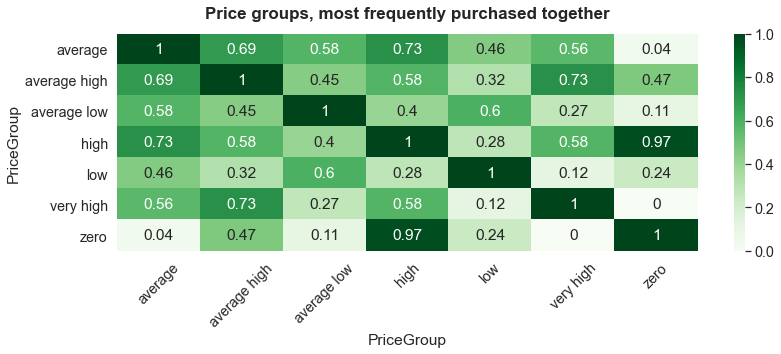

In [97]:
# Prepare data
gr_only=pr_piv.drop(['InvoiceNo', 'GrCount'], axis=1)
gr_corr=gr_only.corr()   
gr_corr=gr_corr.apply(lambda x: round(x, 2))

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,4))
sns.heatmap(gr_corr, annot=True, cmap="Greens", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Price groups, most frequently purchased together",fontsize=17,fontweight="bold",pad=15)
plt.show()

__Most frequently purchased together price groups are:__
- High and Average, Very High and Average High
- Average and Average High
- Average low and low

__Each price group is most frequently accompanied by:__
- Low by average low or average
- Average Low by low, average or average high
- Average by high, average high, average low or very high
- Average High by very high, average or high
- High by zero (looks like these are gifts), average, average high or very high
- Very High by average high, high or average

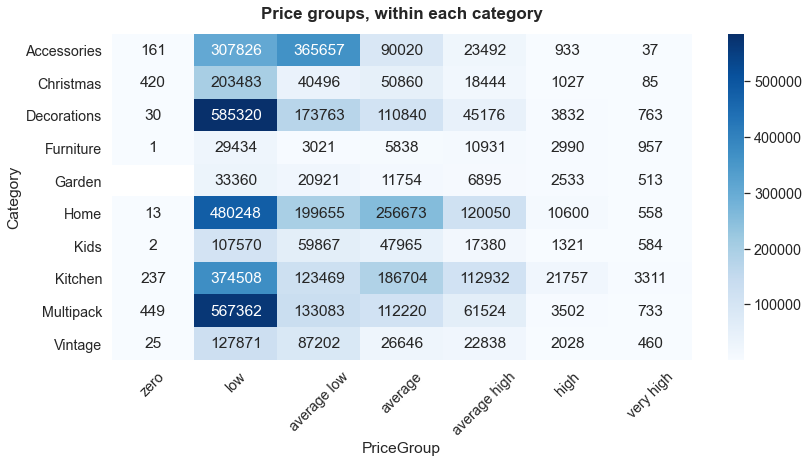

In [98]:
# Calculating amount of categories in each order
compare=o.pivot_table(index='Category', columns='PriceGroup', values='Quantity', aggfunc='sum')
compare=compare[['zero','low','average low','average','average high','high','very high']]

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,6))
sns.heatmap(compare, annot=True, cmap="Blues", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Price groups, within each category",fontsize=17,fontweight="bold",pad=15)
plt.show()

__Price groups within each category__
- Accessories mostly include low and average low priced items
- Christmas mostly include low priced items
- Decorations, Gifts and Crafts mostly include low, average low and average priced items
- Furniture mostly include low and average high priced items
- Garden mostly include low, average low and average priced items
- Home and Living mostly include low, average and average low priced items
- Kids mostly include low, average low and average priced items
- Kitchen and Dining mostly include low, average and average low priced items
- Multipack mostly include low, average low and average priced items
- Vintage mostly include low and average low priced items

__Top combinations of categories and price groups are:__
- Low priced Decoration items
- Low priced Multipack items
- Low priced Home items
- Low priced Kitchen items
- Average low Accessories

### Main and additional products <a class="anchor" id="step3-13"></a>  
[Go back to the Contents](#contents)

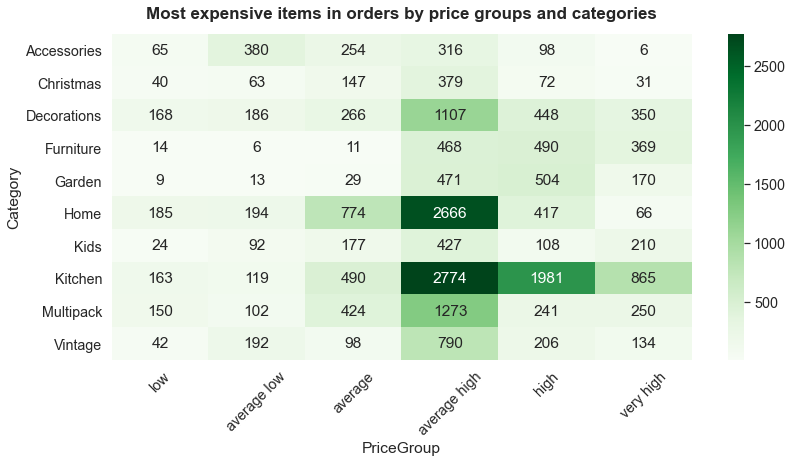

In [99]:
# Prepare data

# Most expensive position in order
main=o.groupby(['InvoiceNo','Category','PriceGroup']).agg({'StockCode':'count','Quantity':'sum',
                                              'UnitPrice':'max','TotalPrice':'sum'}).reset_index()
main_max=main.groupby(['InvoiceNo'])['UnitPrice'].transform(max) == main['UnitPrice']
main_count=main[main_max].groupby(['Category','PriceGroup'])['StockCode'].count().reset_index()
main_piv=main_count.pivot_table(index='Category', columns='PriceGroup', values='StockCode', aggfunc='sum')
main_piv=main_piv.drop(['zero'], axis=1)
main_piv=main_piv[['low','average low','average','average high','high','very high']]

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,6))
sns.heatmap(main_piv, annot=True, cmap="Greens", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Most expensive items in orders by price groups and categories",fontsize=17,fontweight="bold",pad=15)
plt.show()

__Most expensive items in orders by price groups and categories__ 

Most orders' expensive items were from:
- Kitchen and Dining of average high price
- Home and Living of average high price
- Kitchen and Dining of high price
- Multipack of average high price
- Decorations of average high price

Looks like most main products were ordered among theses categories.

In [100]:
# Choosing orders with expensive positions
expensive_items_orders=o[o['PriceGroup']=='very high']['InvoiceNo'].tolist()
ex_or=o[o['InvoiceNo'].isin(expensive_items_orders)]

# Top most expensive positions in orders for top categories
ex_max=ex_or.groupby(['InvoiceNo'])['UnitPrice'].transform(max) == ex_or['UnitPrice']
display(ex_or[(ex_max)&(ex_or['Category']=='Home')]['Description'].value_counts().head(),
        ex_or[(ex_max)&(ex_or['Category']=='Kitchen')]['Description'].value_counts().head(),
        ex_or[(ex_max)&(ex_or['Category']=='Multipack')]['Description'].value_counts().head())

VICTORIAN SEWING BOX LARGE    26
ACRYLIC GEOMETRIC LAMP        10
PARISIENNE SEWING BOX          7
STOOL HOME SWEET HOME          4
SAVOY ART DECO CLOCK           4
Name: Description, dtype: int64

BREAD BIN DINER STYLE IVORY    256
BREAD BIN DINER STYLE RED      193
REGENCY CAKESTAND 3 TIER       164
BREAD BIN DINER STYLE PINK      84
BREAD BIN DINER STYLE MINT      79
Name: Description, dtype: int64

SET/4 WHITE RETRO STORAGE CUBES       151
SET 3 WICKER STORAGE BASKETS           41
SET OF 2 WOODEN MARKET CRATES          19
SET 3 WICKER OVAL BASKETS W LIDS       13
SUNSET COLOUR CHUNKY KNITTED THROW     10
Name: Description, dtype: int64

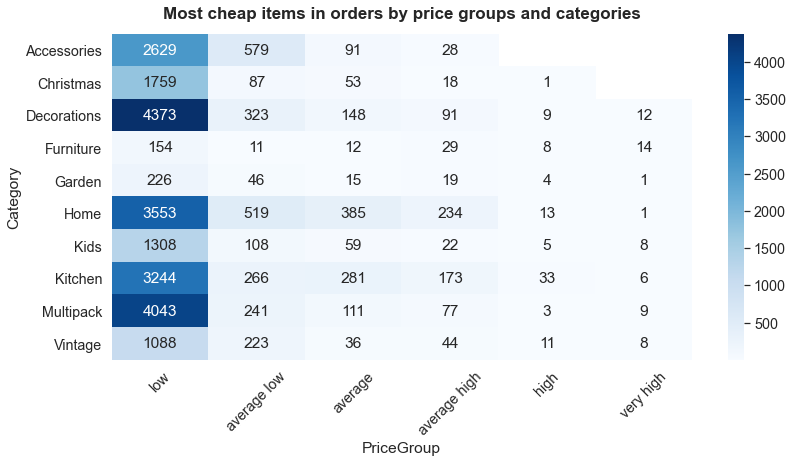

In [101]:
# Prepare data

# Most cheap position in order
add=o.groupby(['InvoiceNo','Category','PriceGroup']).agg({'StockCode':'count','Quantity':'sum',
                                              'UnitPrice':'min','TotalPrice':'sum'}).reset_index()
add_min=add.groupby(['InvoiceNo'])['UnitPrice'].transform(min) == add['UnitPrice']
add_count=add[add_min].groupby(['Category','PriceGroup'])['StockCode'].count().reset_index()
add_piv=add_count.pivot_table(index='Category', columns='PriceGroup', values='StockCode', aggfunc='sum')
add_piv=add_piv.drop(['zero'], axis=1)
add_piv=add_piv[['low','average low','average','average high','high','very high']]

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,6))
sns.heatmap(add_piv, annot=True, cmap="Blues", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Most cheap items in orders by price groups and categories",fontsize=17,fontweight="bold",pad=15)
plt.show()

__Most cheap items in orders by price groups and categories__
- Decorations, Crafts and Gifts with low price range
- Multipack with low price range
- Home and Living with low price range
- Kitchen and Dining with low price range
- Accessories with low price range

So, items in the low price range seem to be most often to be bought as an additional products. Either in bundles with same category items but from another price range or combined together with another categories.

In [102]:
# Choosing orders with cheap positions
cheap_items_orders=o[o['PriceGroup']=='low']['InvoiceNo'].tolist()
ch_or=o[o['InvoiceNo'].isin(cheap_items_orders)]

# Top most cheap positions in orders for top categories
ch_max=ch_or.groupby(['InvoiceNo'])['UnitPrice'].transform(min) == ch_or['UnitPrice']
display(ch_or[(ch_max)&(ch_or['Category']=='Home')]['Description'].value_counts().head(),
        ch_or[(ch_max)&(ch_or['Category']=='Kitchen')]['Description'].value_counts().head(),
        ch_or[(ch_max)&(ch_or['Category']=='Multipack')]['Description'].value_counts().head())

COLOUR GLASS T-LIGHT HOLDER HANGING    196
BOX OF 24 COCKTAIL PARASOLS            162
BATHROOM METAL SIGN                    136
JAZZ HEARTS ADDRESS BOOK               136
CARD PARTY GAMES                       135
Name: Description, dtype: int64

60 TEATIME FAIRY CAKE CASES    231
RED RETROSPOT WRAP             190
BIRTHDAY CARD, RETRO SPOT      183
TEA PARTY BIRTHDAY CARD        161
RED RETROSPOT TAPE             155
Name: Description, dtype: int64

PACK OF 72 RETROSPOT CAKE CASES       340
PACK OF 12 LONDON TISSUES             308
PACK OF 12 HEARTS DESIGN TISSUES      257
PACK OF 60 PINK PAISLEY CAKE CASES    211
PACK OF 12 RED RETROSPOT TISSUES      190
Name: Description, dtype: int64

In [103]:
# Average quantity sold
o.groupby('Category')['Quantity'].median().reset_index().sort_values(by='Quantity', ascending=False)

,Category,Quantity
1,Christmas,6
0,Accessories,4
2,Decorations,4
5,Home,4
6,Kids,4
8,Multipack,4
7,Kitchen,3
9,Vintage,3
3,Furniture,2
4,Garden,2


Also categories with most average quantity sold can indicate that most of it's category products are additional:
like Christmas, that has most average quantity, mostly combined with other categories as Home or Vintage.

And again we can see that categories like Accessories, Decorations, Home, Kids and Multipack seem to have wider range of low price items that usualy are bought in larger quantities as compared to Kitchen, Vintage, Furniture and Garden.

### Bundles <a class="anchor" id="step3-8"></a>  
[Go back to the Contents](#contents)

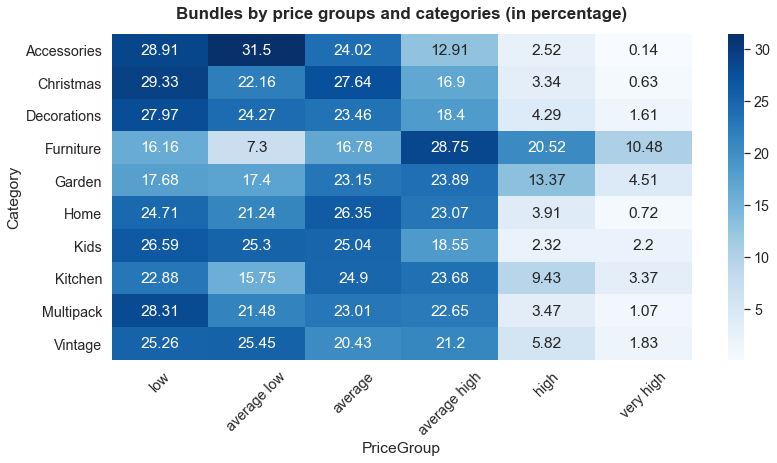

In [104]:
# Prepare data
b_piv=o.pivot_table(index=['InvoiceNo','Category'], columns='PriceGroup', values='Quantity', aggfunc='sum')
b_piv['CatCount']=b_piv.count(axis=1)
b_piv=b_piv.reset_index()
b=b_piv[b_piv['CatCount']>1]
b_gr=b.groupby('Category')[['low','average low','average','average high','high','very high']].count()
b_gr['total']=b_gr.sum(axis=1)
b_gr = b_gr.loc[:,"low":"very high"].div(b_gr["total"], axis=0)*100
b_gr=b_gr.apply(lambda x: round(x, 2))

# Making a heatmap
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(13,6))
sns.heatmap(b_gr, annot=True, cmap="Blues", fmt='g')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Bundles by price groups and categories (in percentage)",fontsize=17,fontweight="bold",pad=15)
plt.show()

So the most common bundles of price ranges within each category were:
- Accessories: average low, low and average
- Christmas: low, average and average low
- Decorations: low, average low, and average
- Furniture: average high and high
- Garden: average high and average
- Home: average, low, average high
- Kids: low, average low and average
- Kitchen: average, average high and low
- Multipack: low, average, average high
- Vintage: low, average low, average high

### EDA Overview <a class="anchor" id="step3-9"></a>  
[Go back to the Contents](#contents)

Write-offs, service notes as well as most outliers and zero price items were removed.

#### Price range
- Real product price range is between zero and 300, with most products below 30
- There are only 52 items with price more than 30
- Most prices are less than 30 (3915 items), among them 33% of items (1301) are less than 1, but not equal to zero
- There are 662 items with price equal to 0
- Major items have prices above 6

Most expensive items listed:
- VINTAGE RED KITCHEN CABINET 
- VINTAGE BLUE KITCHEN CABINET
- RUSTIC SEVENTEEN DRAWER SIDEBOARD
- VINTAGE RED KITCHEN CABINET
- REGENCY MIRROR WITH SHUTTERS

According to price distribution and percentiles found above, I've divided all prices to these categories:
- zero price, 2380 items ordered
- low (below 1.25), 160310 items ordered
- average low (between 1.25 and 2.08), 102825 items ordered
- average (between 2.08 and 4.13), 138221 items ordered
- average high (between 4.13 and 9.95), 102003 items ordered
- high (between 9.95 and 16.63), 18143 items ordered
- very high (above 16.63), 4903 items ordered

I can see that there are not many expensive items sold, though cheap items, with price range 0-2.5 are the most popular. Most items sold are in low price category.

#### Quantity range

- Most products were ordered in quantity 30 or less, there are also 4% of items that were ordered from 30 to 100 positions per order and 1184 unique items, which make 1% that were ordered more than 100 positions per order. Though there are really far lying outliers starts above 700-800 positions.
- The most frequently ordered amount is 1, though we can see that the major positions are ordered in amount of 1 to 12
- Most cancelations were made in amount of 36 positions or less, nearly all cancelations were made for amounts within 180 positions, though we can see that there are some very far lying outliers that starts with amount of 250.
- Top frequently canceled items are in amount of 1, though major cancelations are within 1 to 10 positions.

#### Product Categories
- Home and Living, 103658 positions ordered, which is 20% of all purchases
- Kitchen and Dining, 99929 positions ordered, 19% of all purchases
- Decorations, Crafts and Gifts, 79378 positions ordered, 15% of all purchases
- Multipack, 73731 positions ordered, 14% of all purchases
- Accessories, 71052 positions ordered, 14% of all purchases
- Vintage, 26901 positions ordered, 5% of all purchases
- Kids, 26332 positions ordered, 5% of all purchases
- Christmas, 24496 positions ordered, 5% of all purchases
- Garden, 12393 positions ordered, 2% of all purchases
- Furniture, 8563 positions ordered, 2% of all purchases, though it includes the most expensive items.

_Top-canceled categories_
- 28% Kitchen and Dining, though it's top 2nd sold category, we can see that cancelations in this category are much higher as compared to the proportion of it's sales
- 22% Home and Living, the proportion of cancelations in this category is quite close to it's sales
- 13% Multipack, the proportion of cancelations in this category is quite close to it's sales
- 11% Accessories, the proportion of cancelations is much lower than the sales
- 9% Decorations,  the proportion of cancelations is much lower than the sales
- In minor categories the proportion of cancelations is nearly same as sales, but I can note that Furniture has higher cancelations amount, while Christmas has much lower.

_Top 5 the most frequently ordered items_
1. WHITE HANGING HEART T-LIGHT HOLDER, 2265 orders
2. JUMBO BAG RED RETROSPOT, 2039 orders
3. REGENCY CAKESTAND 3 TIER, 1999 orders
4. PARTY BUNTING, 1690 orders
5. LUNCH BAG RED RETROSPOT, 1566 orders

The least ordered items were ordered once and there are 197 such unique items. There are only 32 items, that were purchased 1000 time or more.

_Top-5 most frequently canceled items_
1. REGENCY CAKESTAND 3 TIER (180)
2. JAM MAKING SET WITH JARS (87)
3. SET OF 3 CAKE TINS PANTRY DESIGN (73)
4. ROSES REGENCY TEACUP AND SAUCER (54)
5. STRAWBERRY CERAMIC TRINKET BOX (52)
That's obvious that the items, that are the most frequently sold would have the most cancelations, though we can see that the most canceled item is not the most sold and it has about 2 times more cancelations as compared to the 2nd place item.

_Most quantity sold_
- 20% Home and Living
- 17% Decorations, Crafts and Gifts. While Decorations is not the most frequently ordered category, we can see that it's very common that it's items are bought in multiple quantity.
- 16% Multipack
- 15% Kitchen and Dining
- 15% Accessories
- Furniture as well as Garden, again has the least items sold.

_Top-5 products with most quantity sold_
- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53847 items sold
- JUMBO BAG RED RETROSPOT, 47359 items sold
- ASSORTED COLOUR BIRD ORNAMENT, 36381 items sold
- POPCORN HOLDER, 36334 items sold
- PACK OF 72 RETROSPOT CAKE CASES, 36039 items sold

#### Seasonality
- Kitchen and Dining is the most frequently ordered category in winter and spring, though it seems to have lots of main products, that are usually purchased in single amount
- Home and Living is very popular all year round, but the most sales we can see in autumn
- We can see that Decorations category is very popular in spring, but also in autumn and winter. Even if it's not the most frequently ordered category, it definetly has great quantity sold.
- Multipack is not the most popular category, in summer it's one of the most popular
- Accessories are very popular in summer and least popular in autumn
- Christmas is mostly popular in autumn, looks like most decorations for christmas are bought before December
- Also I can see that autumn has the most sales, while during other seasons total amounts of sales are quite stable, in autumn we can see nearly 2 times rise in sales.

We can see that each season had it's own top product:
- WHITE HANGING HEART T-LIGHT HOLDER in winter
- WORLD WAR 2 GLIDERS ASSTD DESIGNS in spring
- JUMBO BAG RED RETROSPOT in summer
- POPCORN HOLDER in autumn

#### Recent months changes
- We can see that most frequently ordered items' categories are the same for whole period and recent months as well as total quantity sold. 
- Though among categories there is no difference, we can see that the top products differ between whole year period and 2 recent months.

_Top-5 recently most sold products_
1. RABBIT NIGHT LIGHT, 690 orders with 25131 units sold
2. PAPER CHAIN KIT 50'S CHRISTMAS, 689 orders with 12215 units sold
3. HOT WATER BOTTLE KEEP CALM, 528 orders with 3716 units sold
4. PAPER CHAIN KIT VINTAGE CHRISTMAS, 481 orders with 5774 units sold
5. JUMBO BAG 50'S CHRISTMAS, 459 orders with 6853 units sold	

#### Revenue

_Most revenue, brought by categories_
1. Home and Living, 2,353,640
2. Kitchen and Dining, 2,048,555
3. Multipack, 1,293,858
4. Decorations, Crafts and Gifts, 1,258,854
5. Accessories, 1,219,245

_Most revenue, brought by price groups_
1. Average, 2,591,297
2. Average High, 2,556,040
3. Average Low, 2,066,878
4. Low, 1,943,218

#### Categories, most frequently purchased together

Most orders include 1 or more categories, while having more than 8 categories in one order is rare.
- Kids and Multipack are most frequently purchased together
- Kitchen and Multipack as well as Christmas and Vintage are the second most popular categories purchased together
- 3d most popular purchased together are Kids and Decorations
- Also very popular are Home and Christmas, Kitchen and Kids, Decorations and Multipack

_Each category is most commonly purchased with:_
- Accessories with Kids, Multipack or Vintage
- Christmas with Vintage, Home, Decorations and Garden
- Decorations with Kids, Multipack, Vintage, home and Christmas
- Furniture with Kids and Multipack
- Garden with Christmas
- Home with Christmas, Decorations, Multipack and Kids
- Kids with Multipack, Decorations, Kitchen and Accessories
- Kitchen with Multipack, Kids and Vintage
- Multipack with Kids, Kitchen, Decorations and Accessories
- Vintage with Christmas, Decorations, Kids

#### Price groups, most frequently purchased together

Most orders include more than 1 price groups, though having more than 5 price groups in obe orders is very rare
- High and Average, Very High and Average High
- Average and Average High
- Average low and low

_Each price group is most frequently accompanied by:_
- Low by average low or average
- Average Low by low, average or average high
- Average by high, average high, average low or very high
- Average High by very high, average or high
- High by zero (looks like these are gifts), average, average high or very high
- Very High by average high, high or average

#### Categories and price groups

_Price groups within each category_
- Accessories mostly include low and average low priced items
- Christmas mostly include low priced items
- Decorations, Gifts and Crafts mostly include low, average low and average priced items
- Furniture mostly include low and average high priced items
- Garden mostly include low, average low and average priced items
- Home and Living mostly include low, average and average low priced items
- Kids mostly include low, average low and average priced items
- Kitchen and Dining mostly include low, average and average low priced items
- Multipack mostly include low, average low and average priced items
- Vintage mostly include low and average low priced items

_Top combinations of categories and price groups are:_
- Low priced Decoration items
- Low priced Multipack items
- Low priced Home items
- Low priced Kitchen items
- Average low Accessories

_Most expensive items in orders by price groups and categories_ 
- Kitchen and Dining of average high price
- Home and Living of average high price
- Kitchen and Dining of high price
- Multipack of average high price
- Decorations of average high price
- Looks like most main products were ordered among theses categories.

_Most cheap items in orders by price groups and categories_
- Decorations, Crafts and Gifts with low price range
- Multipack with low price range
- Home and Living with low price range
- Kitchen and Dining with low price range
- Accessories with low price range

So, items in the low price range seem to be most often bought as an additional products. Either in bundles with same category items but from another price range or combined together with another categories.

Also categories with most average quantity sold can indicate that most of it's category products are additional:
like Christmas, that has most average quantity, mostly combined with other categories as Home or Vintage.

And again we can see that categories like Accessories, Decorations, Home, Kids and Multipack seem to have wider range of low price items that usualy are bought in larger quantities as compared to Kitchen, Vintage, Furniture and Garden.

_The most common bundles of price ranges within each category_
- Accessories: average low, low and average
- Christmas: low, average and average low
- Decorations: low, average low, and average
- Furniture: average high and high
- Garden: average high and average
- Home: average, low, average high
- Kids: low, average low and average
- Kitchen: average, average high and low
- Multipack: low, average, average high
- Vintage: low, average low, average high

## Step 4. Testing Hypothesis <a class="anchor" id="step-4"></a>  
[Go back to the Contents](#contents)

### Difference between average price per unit among top two categories <a class="anchor" id="step4-1"></a>  
[Go back to the Contents](#contents)

In [105]:
# Creating groups for the test:
Home_pr=o[o['Category']=='Home']['UnitPrice']
Kitchen_pr=o[o['Category']=='Kitchen']['UnitPrice']

# Checking the length of each sample
print(len(Home_pr))
print(len(Kitchen_pr))

101798
97480


The sample sizes differ, but it shouldn't affect the results of Mann-Whitney test, that I'm going to use, as the  price is continuous non-binary metric and we still have outliers present, so I choose non-parametric test.

Let's see if the average price per unit within the groups differ. 
- As a null hypothesis, I'll claim that the average price per unit is the same for both groups. 
- The alternative hypothesis will be that these two means differs. 

Let's perform the test with 5% significance level.

In [106]:
print('Average price per unit in Home: {0:.3f}'.format(Home_pr.mean()))
print('Average price per unit in Kitchen: {0:.3f}'.format(Kitchen_pr.mean()))
print()
print('Relative difference in average price per unit for Home opposed to Kitchen:')
print("{0:.3f}".format(Home_pr.mean()/Kitchen_pr.mean()-1)) 
print()
print('Mann-Whitney test p-value:')
print("{0:.3f}".format(st.mannwhitneyu(Kitchen_pr, Home_pr)[1]))

Average price per unit in Home: 3.548
Average price per unit in Kitchen: 4.195

Relative difference in average price per unit for Home opposed to Kitchen:
-0.154

Mann-Whitney test p-value:
0.000


We reject the null hypothesis, as the p-value is much lower than the significance level (0.05), so 15% of relative difference in average price per unit between the groups is significant and I can say that Kitchen category has significantly higher average price per unit as compared to Home.

### Difference between average purchase size among top two categories <a class="anchor" id="step4-2"></a>  
[Go back to the Contents](#contents)

In [107]:
# Creating groups for the test:
Home_revenue=o[o['Category']=='Home']['TotalPrice']
Kitchen_revenue=o[o['Category']=='Kitchen']['TotalPrice']

# Checking the length of each sample
print(len(Home_revenue))
print(len(Kitchen_revenue))

101798
97480


Let's see if the average purchase size within the groups differ. 
- As a null hypothesis, I'll claim that the average purchase size is the same for both groups. 
- The alternative hypothesis will be that these two means differs. 

Let's perform the test with 5% significance level.

In [108]:
print('Average total price in Home: {0:.3f}'.format(Home_revenue.mean()))
print('Average total price in Kitchen: {0:.3f}'.format(Kitchen_revenue.mean()))
print()
print('Relative difference in average total price for Home opposed to Kitchen:')
print("{0:.3f}".format(Home_revenue.mean()/Kitchen_revenue.mean()-1)) 
print()
print('Mann-Whitney test p-value:')
print("{0:.3f}".format(st.mannwhitneyu(Kitchen_revenue, Home_revenue)[1]))

Average total price in Home: 23.121
Average total price in Kitchen: 21.015

Relative difference in average total price for Home opposed to Kitchen:
0.100

Mann-Whitney test p-value:
0.000


With such a result we reject the null hypothesis, as the p-value is much lower than the significance level (0.05), so seems like 10% of relative difference in average purchase size between the groups is significant and I can say that Home category has higher average purchase size per item as compared to Kitchen.

### Difference between average quantity among top two categories <a class="anchor" id="step4-3"></a>  
[Go back to the Contents](#contents)

In [109]:
# Creating groups for the test:
Home_quant=o[o['Category']=='Home']['Quantity']
Kitchen_quant=o[o['Category']=='Kitchen']['Quantity']

# Checking the length of each sample
print(len(Home_quant))
print(len(Kitchen_quant))

101798
97480


Let's see if the average quantity within the groups differ. 
- As a null hypothesis, I'll claim that the average quantity is the same for both groups. 
- The alternative hypothesis will be that these two means differs. 

Let's perform the test with 5% significance level.

In [110]:
print('Average quantity in Home: {0:.3f}'.format(Home_quant.mean()))
print('Average quantity in Kitchen: {0:.3f}'.format(Kitchen_quant.mean()))
print()
print('Relative difference in average quantity for Home opposed to Kitchen:')
print("{0:.3f}".format(Home_quant.mean()/Kitchen_quant.mean()-1)) 
print()
print('Mann-Whitney test p-value:')
print("{0:.3f}".format(st.mannwhitneyu(Kitchen_quant, Home_quant)[1]))

Average quantity in Home: 10.489
Average quantity in Kitchen: 8.442

Relative difference in average quantity for Home opposed to Kitchen:
0.243

Mann-Whitney test p-value:
0.000


With such a result we reject the null hypothesis, as the p-value is much lower than the significance level (0.05), so 24% of relative difference in average quantity between the groups is significant and I can say that Home category has higher average quantity per purchase as compared to Kitchen.

### Difference between orders amount among top two categories <a class="anchor" id="step4-4"></a>  
[Go back to the Contents](#contents)

In [111]:
def z_test_proportional(val1, val2, val3, val4, alternative):
    #alternatives: 'two-sided', 'smaller', 'larger'
    significance = 0.05
    sample_success_a, sample_size_a = (val1, val2)
    sample_success_b, sample_size_b = (val3, val4)
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative=alternative)
    print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
    if p_value < significance:
        print("Reject the null hypothesis - suggest the alternative hypothesis is true")
    else:
        print("Fail to reject the null hypothesis")

In [112]:
print('Amount of orders in Home category: {:.2%}'.format(len(o[o['Category']=='Home'])/len(o)))
print('Amount of orders in Kitchen category: {:.2%}'.format(len(o[o['Category']=='Kitchen'])/len(o)))
print()
print('Z-test results:')
z_test_proportional(len(o[o['Category']=='Home']), len(o),
                    len(o[o['Category']=='Kitchen']), len(o), 'two-sided')

Amount of orders in Home category: 19.66%
Amount of orders in Kitchen category: 18.83%

Z-test results:
z_stat: 10.764, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


We reject the null hypothesis, as the p-value is much lower than the significance level (0.05), so 0.8% of difference in amount of orders between the groups is significant and I can say that Home category has significantly more orders as compared to Kitchen.

### Testing overview <a class="anchor" id="step4-5"></a>  
[Go back to the Contents](#contents)

According to tests I can say that:

While Kitchen category has significantly higher (by 15%) price per unit, Home category has significantly higher total revenue (by 10%), quantity ordered per unit (by 24%) and total amount of orders (by 0.8%).

## Overall Conclusion <a class="anchor" id="overall"></a>  
[Go back to the Contents](#contents)

### Data Overview
- All orders took place between 29/11/2018-07/12/2019, a bit more than a year period
- There were 25900 (4.8%) unique invoices (orders)
- There were 4070 unique items, though there were 4223 unique item's descriptions, so some products can have several descriptions.
- Rows with missing descriptions were deleted
- There are negative quantaties, which were either a write-off or cancelation. 
- There are negative prices as well, which also were either a write-off, cancelation, fees
- There are zero prices, most of which were write-offs
- "Description" field was used not just as item description but for remarks as well as "damaged" or any problems with items. Some products with notes instead of the description had negative quantity and zero price.
- There are a lot of cancelations that were done as additional order with negative quantity and they make about 2% of all rows.
- High prices, that were postal charges
- There are 4372 unique customers and about 25% of values in the column are missing. Most of such rows appeared to be write-offs, fees or other service notes as well as orders without customer id.
- On average, each customer did 93 orders, though we can see that the data is very skewed as median amount of orders is only 42. There are definetly present both type of customers: corporate and private clients.
- Most users did 700 orders or less, but we can see that there are customers who placed up to 7983 orders. 
- Most duplicated items were totaly identical, but we can see that there were items that had different quantity. May be these were items that were added to cart a couple of times and there is no automatical feature that combines them, so a customer could really purchase same item 2 times instead of having it once in the cart with right amount. So I adjusted the amount of such items to get rid of duplicates.
- After cleaning there are 650 unique stock codes have more than 1 description, that make 16% of all unique stock codes.
- 91% (3603 out of 3958) of all unique items have more than one price, so seems like prices could depend on discounts for corporative clients or change with time or be affected by the promos. Most price varience have service operations with stock codes:
    - DOT (687)
    - M (260)
    - POST (114)
    - D (75)
    - S (59)
- Write-offs, service notes as well as most outliers and zero price items were removed for further analysis

### Product Range Analysis

#### Price range
- Real product price range is between zero and 300, with most products below 30
- There are only 52 items with price more than 30
- Most prices are less than 30 (3915 items), among them 33% of items (1301) are less than 1, but not equal to zero
- There are 662 items with price equal to 0
- Major items have prices above 6

Most expensive items listed:
- VINTAGE RED KITCHEN CABINET 
- VINTAGE BLUE KITCHEN CABINET
- RUSTIC SEVENTEEN DRAWER SIDEBOARD
- VINTAGE RED KITCHEN CABINET
- REGENCY MIRROR WITH SHUTTERS

According to price distribution and percentiles found above, I've divided all prices to these categories:
- zero price, 2380 items ordered
- low (below 1.25), 160310 items ordered
- average low (between 1.25 and 2.08), 102825 items ordered
- average (between 2.08 and 4.13), 138221 items ordered
- average high (between 4.13 and 9.95), 102003 items ordered
- high (between 9.95 and 16.63), 18143 items ordered
- very high (above 16.63), 4903 items ordered

I can see that there are not many expensive items sold, though cheap items, with price range 0-2.5 are the most popular. Most items sold are in low price category.

#### Quantity range

- Most products were ordered in quantity 30 or less, there are also 4% of items that were ordered from 30 to 100 positions per order and 1184 unique items, which make 1% that were ordered more than 100 positions per order. Though there are really far lying outliers starts above 700-800 positions.
- The most frequently ordered amount is 1, though we can see that the major positions are ordered in amount of 1 to 12
- Most cancelations were made in amount of 36 positions or less, nearly all cancelations were made for amounts within 180 positions, though we can see that there are some very far lying outliers that starts with amount of 250.
- Top frequently canceled items are in amount of 1, though major cancelations are within 1 to 10 positions.

#### Product Categories
- Home and Living, 103658 positions ordered, which is 20% of all purchases
- Kitchen and Dining, 99929 positions ordered, 19% of all purchases
- Decorations, Crafts and Gifts, 79378 positions ordered, 15% of all purchases
- Multipack, 73731 positions ordered, 14% of all purchases
- Accessories, 71052 positions ordered, 14% of all purchases
- Vintage, 26901 positions ordered, 5% of all purchases
- Kids, 26332 positions ordered, 5% of all purchases
- Christmas, 24496 positions ordered, 5% of all purchases
- Garden, 12393 positions ordered, 2% of all purchases
- Furniture, 8563 positions ordered, 2% of all purchases, though it includes the most expensive items.

_Top-canceled categories_
- 28% Kitchen and Dining, though it's top 2nd sold category, we can see that cancelations in this category are much higher as compared to the proportion of it's sales
- 22% Home and Living, the proportion of cancelations in this category is quite close to it's sales
- 13% Multipack, the proportion of cancelations in this category is quite close to it's sales
- 11% Accessories, the proportion of cancelations is much lower than the sales
- 9% Decorations,  the proportion of cancelations is much lower than the sales
- In minor categories the proportion of cancelations is nearly same as sales, but I can note that Furniture has higher cancelations amount, while Christmas has much lower.

_Top 5 the most frequently ordered items_
1. WHITE HANGING HEART T-LIGHT HOLDER, 2265 orders
2. JUMBO BAG RED RETROSPOT, 2039 orders
3. REGENCY CAKESTAND 3 TIER, 1999 orders
4. PARTY BUNTING, 1690 orders
5. LUNCH BAG RED RETROSPOT, 1566 orders

The least ordered items were ordered once and there are 197 such unique items. There are only 32 items, that were purchased 1000 time or more.

_Top-5 most frequently canceled items_
1. REGENCY CAKESTAND 3 TIER (180)
2. JAM MAKING SET WITH JARS (87)
3. SET OF 3 CAKE TINS PANTRY DESIGN (73)
4. ROSES REGENCY TEACUP AND SAUCER (54)
5. STRAWBERRY CERAMIC TRINKET BOX (52)
That's obvious that the items, that are the most frequently sold would have the most cancelations, though we can see that the most canceled item is not the most sold and it has about 2 times more cancelations as compared to the 2nd place item.

_Most quantity sold_
- 20% Home and Living
- 17% Decorations, Crafts and Gifts. While Decorations is not the most frequently ordered category, we can see that it's very common that it's items are bought in multiple quantity.
- 16% Multipack
- 15% Kitchen and Dining
- 15% Accessories
- Furniture as well as Garden, again has the least items sold.

_Top-5 products with most quantity sold_
- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53847 items sold
- JUMBO BAG RED RETROSPOT, 47359 items sold
- ASSORTED COLOUR BIRD ORNAMENT, 36381 items sold
- POPCORN HOLDER, 36334 items sold
- PACK OF 72 RETROSPOT CAKE CASES, 36039 items sold

#### Seasonality
- Kitchen and Dining is the most frequently ordered category in winter and spring, though it seems to have lots of main products, that are usually purchased in single amount
- Home and Living is very popular all year round, but the most sales we can see in autumn
- We can see that Decorations category is very popular in spring, but also in autumn and winter. Even if it's not the most frequently ordered category, it definetly has great quantity sold.
- Multipack is not the most popular category, in summer it's one of the most popular
- Accessories are very popular in summer and least popular in autumn
- Christmas is mostly popular in autumn, looks like most decorations for christmas are bought before December
- Also I can see that autumn has the most sales, while during other seasons total amounts of sales are quite stable, in autumn we can see nearly 2 times rise in sales.

We can see that each season had it's own top product:
- WHITE HANGING HEART T-LIGHT HOLDER in winter
- WORLD WAR 2 GLIDERS ASSTD DESIGNS in spring
- JUMBO BAG RED RETROSPOT in summer
- POPCORN HOLDER in autumn

#### Recent months changes
- We can see that most frequently ordered items' categories are the same for whole period and recent months as well as total quantity sold. 
- Though among categories there is no difference, we can see that the top products differ between whole year period and 2 recent months.

_Top-5 recently most sold products_
1. RABBIT NIGHT LIGHT, 690 orders with 25131 units sold
2. PAPER CHAIN KIT 50'S CHRISTMAS, 689 orders with 12215 units sold
3. HOT WATER BOTTLE KEEP CALM, 528 orders with 3716 units sold
4. PAPER CHAIN KIT VINTAGE CHRISTMAS, 481 orders with 5774 units sold
5. JUMBO BAG 50'S CHRISTMAS, 459 orders with 6853 units sold	

#### Revenue

_Most revenue, brought by categories_
1. Home and Living, 2,353,640
2. Kitchen and Dining, 2,048,555
3. Multipack, 1,293,858
4. Decorations, Crafts and Gifts, 1,258,854
5. Accessories, 1,219,245

_Most revenue, brought by price groups_
1. Average, 2,591,297
2. Average High, 2,556,040
3. Average Low, 2,066,878
4. Low, 1,943,218

_Top-Revenue Items_
- REGENCY CAKESTAND 3 TIER, 174484.74
- WHITE HANGING HEART T-LIGHT HOLDER, 106292.77
- PARTY BUNTING, 99504.33
- JUMBO BAG RED RETROSPOT, 94340.05
- RABBIT NIGHT LIGHT, 66964.99

#### Categories, most frequently purchased together

Most orders include 1 or more categories, while having more than 8 categories in one order is rare.
- Kids and Multipack are most frequently purchased together
- Kitchen and Multipack as well as Christmas and Vintage are the second most popular categories purchased together
- 3d most popular purchased together are Kids and Decorations
- Also very popular are Home and Christmas, Kitchen and Kids, Decorations and Multipack

_Categories, most commonly purchased together_
- Accessories with Kids, Multipack or Vintage
- Christmas with Vintage, Home, Decorations and Garden
- Decorations with Kids, Multipack, Vintage, home and Christmas
- Furniture with Kids and Multipack
- Garden with Christmas
- Home with Christmas, Decorations, Multipack and Kids
- Kids with Multipack, Decorations, Kitchen and Accessories
- Kitchen with Multipack, Kids and Vintage
- Multipack with Kids, Kitchen, Decorations and Accessories
- Vintage with Christmas, Decorations, Kids

#### Price groups, most frequently purchased together

Most orders include more than 1 price groups, though having more than 5 price groups in one order is very rare
- High and Average, Very High and Average High
- Average and Average High
- Average low and low

_Price groups, most frequently purchased together_
- Low by average low or average
- Average Low by low, average or average high
- Average by high, average high, average low or very high
- Average High by very high, average or high
- High by zero (looks like these are gifts), average, average high or very high
- Very High by average high, high or average

#### Categories and price groups

_Price groups within each category_
- Accessories mostly include low and average low priced items
- Christmas mostly include low priced items
- Decorations, Gifts and Crafts mostly include low, average low and average priced items
- Furniture mostly include low and average high priced items
- Garden mostly include low, average low and average priced items
- Home and Living mostly include low, average and average low priced items
- Kids mostly include low, average low and average priced items
- Kitchen and Dining mostly include low, average and average low priced items
- Multipack mostly include low, average low and average priced items
- Vintage mostly include low and average low priced items

_Top combinations of categories and price groups are:_
- Low priced Decoration items
- Low priced Multipack items
- Low priced Home items
- Low priced Kitchen items
- Average low Accessories

_Most expensive items in orders by price groups and categories_ 
- Kitchen and Dining of average high price
- Home and Living of average high price
- Kitchen and Dining of high price
- Multipack of average high price
- Decorations of average high price
- Looks like most main products were ordered among theses categories.

_Most cheap items in orders by price groups and categories_
- Decorations, Crafts and Gifts with low price range
- Multipack with low price range
- Home and Living with low price range
- Kitchen and Dining with low price range
- Accessories with low price range

So, items in the low price range seem to be most often bought as an additional products. Either in bundles with same category items but from another price range or combined together with another categories.

Also categories with most average quantity sold can indicate that most of it's category products are additional:
like Christmas, that has most average quantity, mostly combined with other categories as Home or Vintage.

And again we can see that categories like Accessories, Decorations, Home, Kids and Multipack seem to have wider range of low price items that usualy are bought in larger quantities as compared to Kitchen, Vintage, Furniture and Garden.

_The most common bundles of price ranges within each category_
- Accessories: average low, low and average
- Christmas: low, average and average low
- Decorations: low, average low, and average
- Furniture: average high and high
- Garden: average high and average
- Home: average, low, average high
- Kids: low, average low and average
- Kitchen: average, average high and low
- Multipack: low, average, average high
- Vintage: low, average low, average high

### Hypothesis testing

According to tests I can say that:

While Kitchen category has significantly higher (by 15%) price per unit, Home category has significantly higher total revenue (by 10%), quantity ordered per unit (by 24%) and total amount of orders (by 0.8%).

## Suggestions

Considering customers behavior, I can say that:
- For optimizing purchases as well as for updating product range with new items I would suggest checking list of _"Price groups within each category"_ where the most popular price ranges for each category is listed. Also for considering quantity required I would suggest checking the list "_Most quantity sold_" and keep in mind that major items are ordered in amount of 1 to 12.
- For offers I would recommend to use list "_Categories, most commonly purchased together_" and "_Price groups, most frequently purchased together_" as well as checking most popular price groups within each category in the "_Price groups within each category_" list
- For bundles I would suggest bundle best-sellers with high margin products, using items from same category. It's easy to find complimentary products, items most commonly purchased together within the same order with same category but different price ranges are listed in "_The most common bundles of price ranges within each category_", also best-sellers can be found in top sold items, listed above.
- Also I can see that customers tend to like free samples or low-priced products, using them can help boost customer's loyalty
- Many customers tend to order products in large quantity, by offering customers a deal if they purchase multiple products – such as 2 for 1 or buy 2 and get 1 free – can increas the likelihood of a purchase based on the psychology of the individual thinking they have secured a great deal
- Cross-sells could be a great way to increase the average order value by offering interesting or complementary products to buy-ready customers at the time of purchase, according to lists suggested above.

## Presentstion <a class="anchor" id="pres"></a>  
[Go back to the Contents](#contents)

__[Link to view presentation](https://drive.google.com/file/d/1TIS8qnk-AHg4Bt7j8DorzIzOaqxf95dF/view?usp=sharing)__

## Dashboard <a class="anchor" id="dash"></a>  
[Go back to the Contents](#contents)

__[Link to dashboard](https://public.tableau.com/profile/verkberk#!/vizhome/ProductRange/ProductRangeDashboard)__